# Chapter 17: Differential Equations

*Mathematics for Psychologists and Computation*

Welcome to Chapter 17, where we'll explore differential equations - mathematical equations that relate a function with its derivatives. Differential equations are powerful tools for modeling dynamic systems and processes that change over time, making them particularly relevant for psychological research.

In this chapter, we'll learn how differential equations can help us understand and model various psychological phenomena, from learning and memory processes to population dynamics and neural activity.

## 1. Introduction to Differential Equations

A differential equation is an equation that relates a function with one or more of its derivatives. In simpler terms, it's an equation that describes how a quantity changes in relation to other quantities.

### 1.1 Why Differential Equations Matter in Psychology

Differential equations are particularly useful in psychology for several reasons:

1. **Modeling Dynamic Processes**: Many psychological phenomena involve change over time (learning, memory decay, emotional responses)
2. **Describing Complex Systems**: Neural networks, population dynamics, and social interactions can be modeled using systems of differential equations
3. **Predicting Future States**: Once we have a differential equation model, we can predict how a system will evolve
4. **Testing Theories**: Differential equations allow us to formalize psychological theories in mathematical terms

Let's start by importing the libraries we'll need throughout this chapter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import pandas as pd
import seaborn as sns

# Set plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Types of Differential Equations

Differential equations come in various forms:

1. **Ordinary Differential Equations (ODEs)**: Involve derivatives with respect to a single variable (usually time)
2. **Partial Differential Equations (PDEs)**: Involve partial derivatives with respect to multiple variables
3. **Linear vs. Nonlinear**: Linear DEs involve linear combinations of the function and its derivatives
4. **First-Order vs. Higher-Order**: Classified by the highest derivative that appears

In this chapter, we'll focus primarily on ordinary differential equations (ODEs) as they're most commonly used in psychological research.

### 1.3 Notation and Basic Concepts

Let's denote a function as $y(t)$, where $t$ often represents time. The derivative of $y$ with respect to $t$ is written as:

$$\frac{dy}{dt} \text{ or } y'(t) \text{ or } \dot{y}$$

A first-order ODE can be written in the form:

$$\frac{dy}{dt} = f(t, y)$$

Where $f(t, y)$ is some function of $t$ and $y$.

A second-order ODE involves the second derivative:

$$\frac{d^2y}{dt^2} = f\left(t, y, \frac{dy}{dt}\right)$$

Let's look at some examples of differential equations that appear in psychological contexts:

## 2. First-Order Differential Equations in Psychology

First-order differential equations are the simplest type and are widely used in psychological modeling. Let's explore some common examples.

### 2.1 Exponential Growth and Decay

One of the simplest differential equations is:

$$\frac{dy}{dt} = ky$$

Where $k$ is a constant. This equation models exponential growth (when $k > 0$) or decay (when $k < 0$).

In psychology, this equation can model:
- Memory decay (forgetting curve)
- Skill acquisition
- Spread of information in social networks

The solution to this equation is:

$$y(t) = y_0 e^{kt}$$

Where $y_0$ is the initial value at $t = 0$.

Let's implement and visualize this model for memory decay:

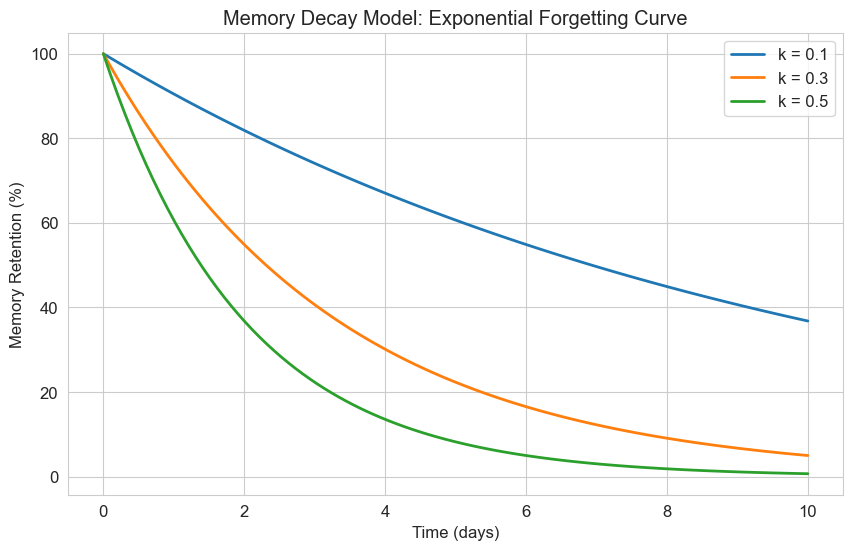

In [2]:
# Define the exponential decay model
def memory_decay(y, t, k):
    """Exponential decay model for memory"""
    return -k * y  # Negative k for decay

# Time points
t = np.linspace(0, 10, 100)

# Initial memory retention (100%)
y0 = 100

# Different decay rates
decay_rates = [0.1, 0.3, 0.5]
labels = [f'k = {k}' for k in decay_rates]

plt.figure(figsize=(10, 6))

for k, label in zip(decay_rates, labels):
    # Solve the ODE
    solution = odeint(memory_decay, y0, t, args=(k,))
    
    # Plot the solution
    plt.plot(t, solution, label=label, linewidth=2)

plt.title('Memory Decay Model: Exponential Forgetting Curve')
plt.xlabel('Time (days)')
plt.ylabel('Memory Retention (%)')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Ebbinghaus Forgetting Curve

Hermann Ebbinghaus, a pioneer in memory research, found that memory retention follows a specific pattern over time. His forgetting curve can be modeled with a modified exponential decay equation:

$$R = e^{-\frac{t}{S}}$$

Where:
- $R$ is the memory retention (as a percentage)
- $t$ is the time
- $S$ is the "strength" of the memory

Let's implement this model and compare it with real data:

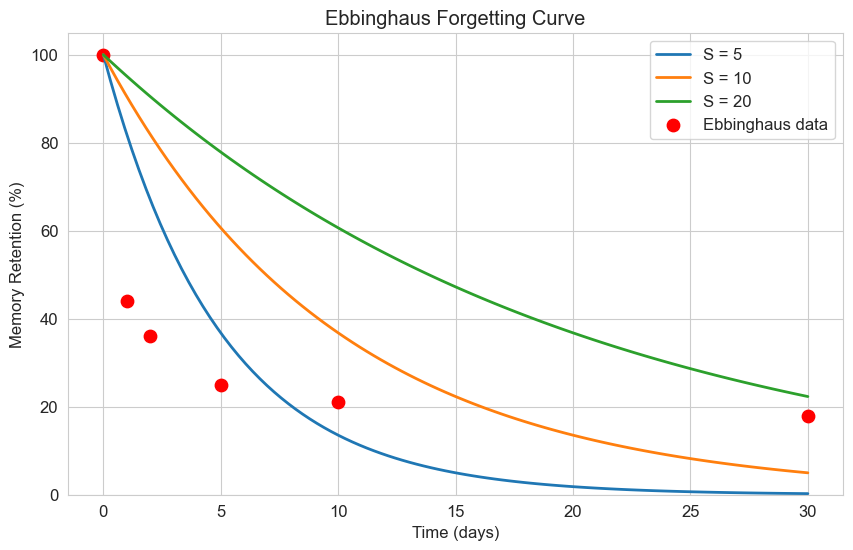

In [3]:
# Ebbinghaus forgetting curve model
def ebbinghaus_curve(t, S):
    """Ebbinghaus forgetting curve model"""
    return 100 * np.exp(-t/S)  # 100% initial retention

# Time points (in days)
t = np.linspace(0, 30, 100)

# Ebbinghaus's original data (approximate)
original_data_t = [0, 1, 2, 5, 10, 30]
original_data_r = [100, 44, 36, 25, 21, 18]

# Different memory strengths
strengths = [5, 10, 20]
labels = [f'S = {s}' for s in strengths]

plt.figure(figsize=(10, 6))

# Plot the model with different strengths
for S, label in zip(strengths, labels):
    retention = ebbinghaus_curve(t, S)
    plt.plot(t, retention, label=label, linewidth=2)

# Plot Ebbinghaus's original data
plt.scatter(original_data_t, original_data_r, color='red', s=80, label='Ebbinghaus data')

plt.title('Ebbinghaus Forgetting Curve')
plt.xlabel('Time (days)')
plt.ylabel('Memory Retention (%)')
plt.legend()
plt.grid(True)
plt.ylim(0, 105)
plt.show()

### 2.3 Logistic Growth Model

The logistic growth model is another important first-order differential equation:

$$\frac{dy}{dt} = ry\left(1-\frac{y}{K}\right)$$

Where:
- $r$ is the growth rate
- $K$ is the carrying capacity (maximum value)

This model is useful for describing processes that initially grow exponentially but then level off as they approach a maximum value. In psychology, it can model:

- Skill acquisition with a ceiling effect
- Adoption of new technologies or ideas
- Learning curves

Let's implement and visualize this model for skill acquisition:

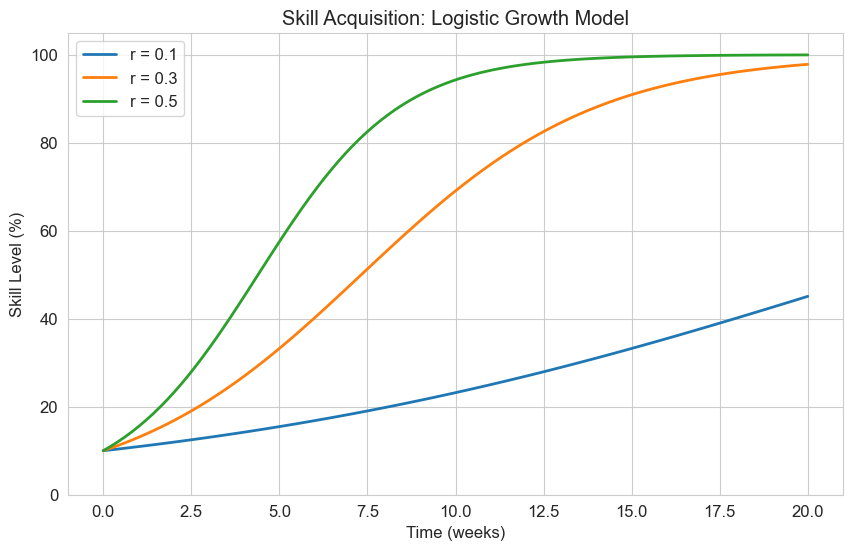

In [4]:
# Define the logistic growth model
def logistic_growth(y, t, r, K):
    """Logistic growth model"""
    return r * y * (1 - y/K)

# Time points
t = np.linspace(0, 20, 100)

# Initial skill level (10%)
y0 = 10

# Maximum skill level (100%)
K = 100

# Different learning rates
learning_rates = [0.1, 0.3, 0.5]
labels = [f'r = {r}' for r in learning_rates]

plt.figure(figsize=(10, 6))

for r, label in zip(learning_rates, labels):
    # Solve the ODE
    solution = odeint(logistic_growth, y0, t, args=(r, K))
    
    # Plot the solution
    plt.plot(t, solution, label=label, linewidth=2)

plt.title('Skill Acquisition: Logistic Growth Model')
plt.xlabel('Time (weeks)')
plt.ylabel('Skill Level (%)')
plt.legend()
plt.grid(True)
plt.ylim(0, 105)
plt.show()

### 2.4 Power Law of Practice

The power law of practice is a well-established principle in psychology that describes how performance improves with practice. While not typically written as a differential equation, we can derive it from one.

The power law states that the time $T$ to perform a task after $N$ practice trials follows:

$$T(N) = T_1 N^{-\alpha}$$

Where:
- $T_1$ is the time to perform the first trial
- $\alpha$ is the learning rate (typically around 0.2 to 0.4)

Let's visualize this model and compare it with some simulated data:

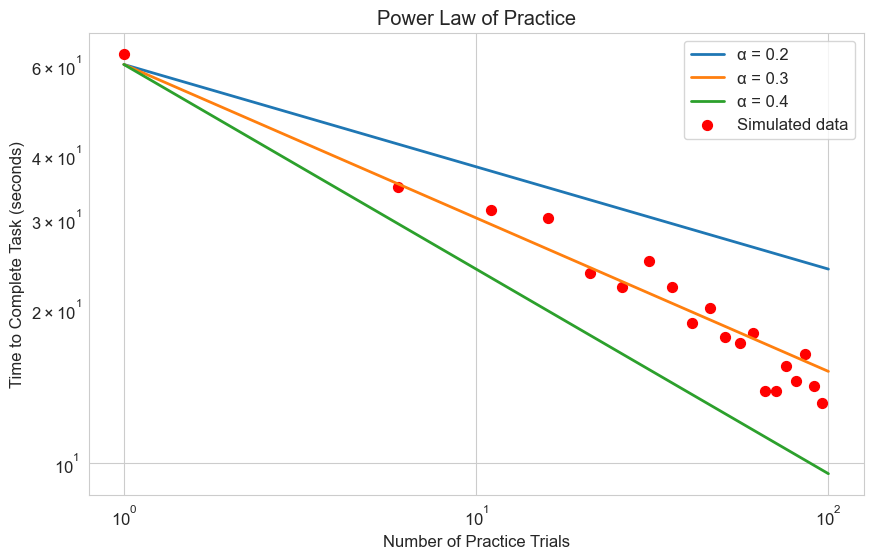

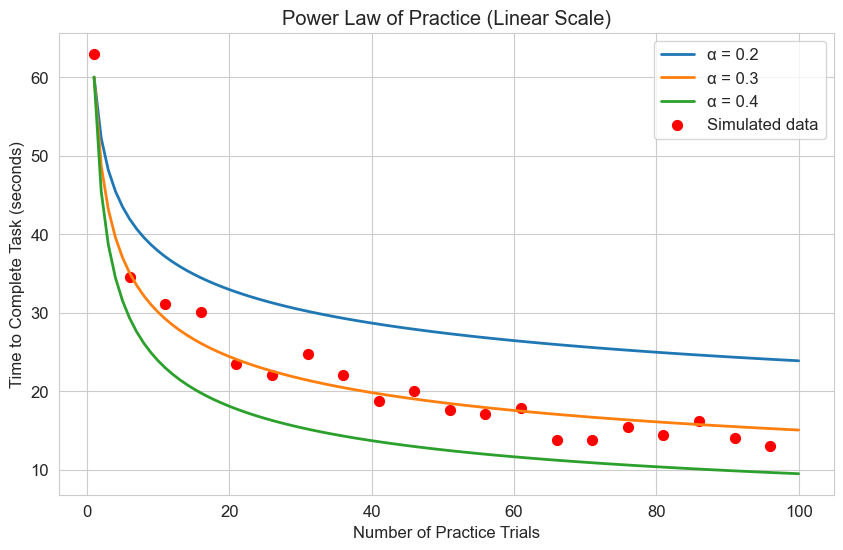

In [5]:
# Power law of practice model
def power_law(N, T1, alpha):
    """Power law of practice model"""
    return T1 * N**(-alpha)

# Number of practice trials
N = np.linspace(1, 100, 100)

# Initial time (seconds)
T1 = 60

# Different learning rates
alphas = [0.2, 0.3, 0.4]
labels = [f'α = {a}' for a in alphas]

# Generate some simulated data with noise
np.random.seed(42)
N_data = np.arange(1, 101, 5)  # Sparse data points
T_data = power_law(N_data, T1, 0.3) * (1 + 0.1 * np.random.randn(len(N_data)))

plt.figure(figsize=(10, 6))

# Plot the model with different learning rates
for alpha, label in zip(alphas, labels):
    T = power_law(N, T1, alpha)
    plt.plot(N, T, label=label, linewidth=2)

# Plot the simulated data
plt.scatter(N_data, T_data, color='red', s=50, label='Simulated data')

plt.title('Power Law of Practice')
plt.xlabel('Number of Practice Trials')
plt.ylabel('Time to Complete Task (seconds)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Plot in linear scale
plt.figure(figsize=(10, 6))
for alpha, label in zip(alphas, labels):
    T = power_law(N, T1, alpha)
    plt.plot(N, T, label=label, linewidth=2)
plt.scatter(N_data, T_data, color='red', s=50, label='Simulated data')
plt.title('Power Law of Practice (Linear Scale)')
plt.xlabel('Number of Practice Trials')
plt.ylabel('Time to Complete Task (seconds)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Second-Order Differential Equations

Second-order differential equations involve the second derivative of a function. They're particularly useful for modeling systems with oscillatory behavior or systems that exhibit both position and velocity components.

### 3.1 Harmonic Oscillator Model

The classic second-order differential equation is the harmonic oscillator:

$$\frac{d^2x}{dt^2} + \omega^2 x = 0$$

Where:
- $x$ is the position
- $\omega$ is the angular frequency

In psychology, this can model:
- Mood oscillations
- Attention fluctuations
- Cyclical patterns in behavior

The solution to this equation is:

$$x(t) = A \cos(\omega t + \phi)$$

Where $A$ is the amplitude and $\phi$ is the phase shift.

Let's implement and visualize this model for mood oscillations:

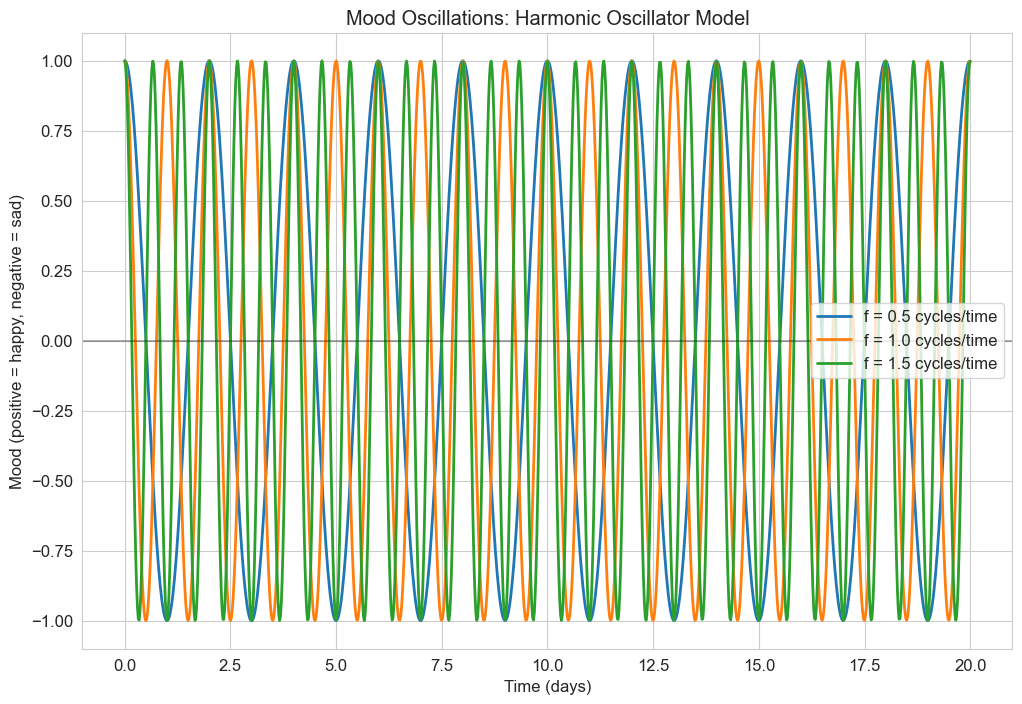

In [6]:
# To solve a second-order ODE, we need to convert it to a system of first-order ODEs
def harmonic_oscillator(t, y, omega):
    """Harmonic oscillator model
    y[0] is position x
    y[1] is velocity v = dx/dt
    """
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]

# Time points
t = np.linspace(0, 20, 1000)

# Initial conditions: [x0, v0]
y0 = [1, 0]  # Start at position 1 with zero velocity

# Different frequencies (cycles per time unit)
frequencies = [0.5, 1.0, 1.5]  # cycles per time unit
omegas = [2*np.pi*f for f in frequencies]  # convert to angular frequency
labels = [f'f = {f} cycles/time' for f in frequencies]

plt.figure(figsize=(12, 8))

for omega, label in zip(omegas, labels):
    # Solve the ODE system
    solution = solve_ivp(
        lambda t, y: harmonic_oscillator(t, y, omega),
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45'
    )
    
    # Plot the position (mood)
    plt.plot(solution.t, solution.y[0], label=label, linewidth=2)

plt.title('Mood Oscillations: Harmonic Oscillator Model')
plt.xlabel('Time (days)')
plt.ylabel('Mood (positive = happy, negative = sad)')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

### 3.2 Damped Harmonic Oscillator

In reality, oscillations often diminish over time due to damping. The damped harmonic oscillator equation is:

$$\frac{d^2x}{dt^2} + 2\zeta\omega\frac{dx}{dt} + \omega^2 x = 0$$

Where:
- $\zeta$ is the damping ratio
- $\omega$ is the natural frequency

This model is more realistic for psychological phenomena, as most oscillatory behaviors tend to stabilize over time. For example, emotional responses to events typically diminish in intensity over time.

Let's implement and visualize this model for emotional responses:

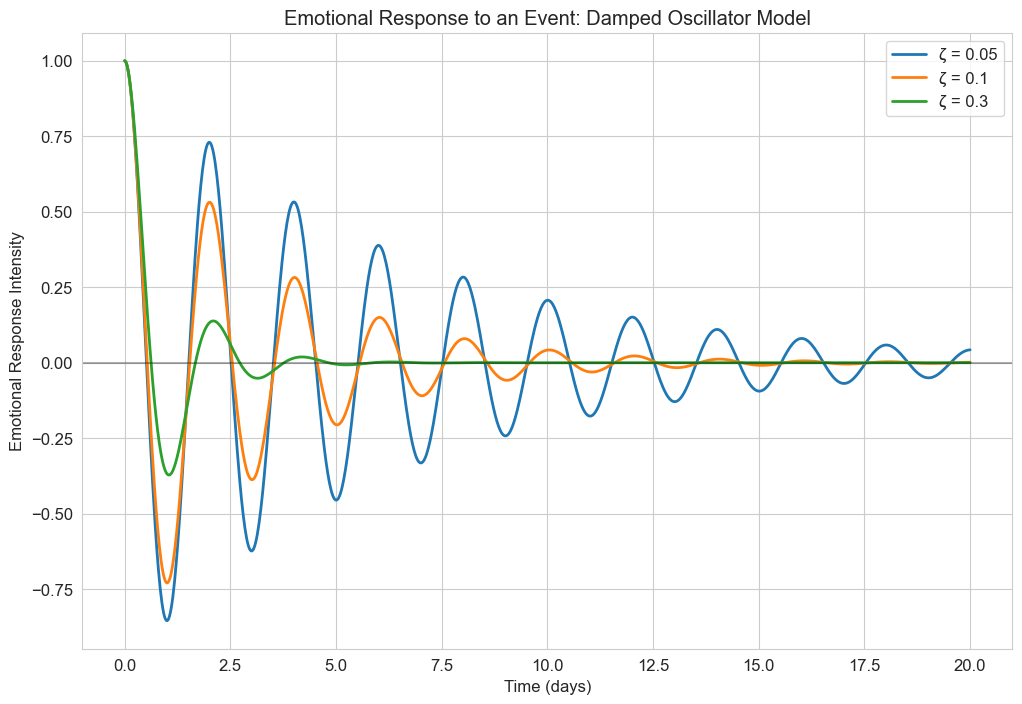

In [7]:
# Damped harmonic oscillator model
def damped_oscillator(t, y, zeta, omega):
    """Damped harmonic oscillator model
    y[0] is position x
    y[1] is velocity v = dx/dt
    """
    x, v = y
    dxdt = v
    dvdt = -2 * zeta * omega * v - omega**2 * x
    return [dxdt, dvdt]

# Time points
t = np.linspace(0, 20, 1000)

# Initial conditions: [x0, v0]
y0 = [1, 0]  # Start at position 1 with zero velocity

# Fixed frequency
omega = 2 * np.pi * 0.5  # 0.5 cycles per time unit

# Different damping ratios
damping_ratios = [0.05, 0.1, 0.3]
labels = [f'ζ = {zeta}' for zeta in damping_ratios]

plt.figure(figsize=(12, 8))

for zeta, label in zip(damping_ratios, labels):
    # Solve the ODE system
    solution = solve_ivp(
        lambda t, y: damped_oscillator(t, y, zeta, omega),
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45'
    )
    
    # Plot the position (emotional response)
    plt.plot(solution.t, solution.y[0], label=label, linewidth=2)

plt.title('Emotional Response to an Event: Damped Oscillator Model')
plt.xlabel('Time (days)')
plt.ylabel('Emotional Response Intensity')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

### 3.3 Forced Oscillations: External Stimuli

In many psychological contexts, systems are subject to external forces or stimuli. The forced oscillator equation is:

$$\frac{d^2x}{dt^2} + 2\zeta\omega\frac{dx}{dt} + \omega^2 x = F(t)$$

Where $F(t)$ is the external forcing function.

This can model how psychological systems respond to external stimuli, such as how attention might oscillate in response to periodic distractions.

Let's implement a model where attention is periodically disrupted by external stimuli:

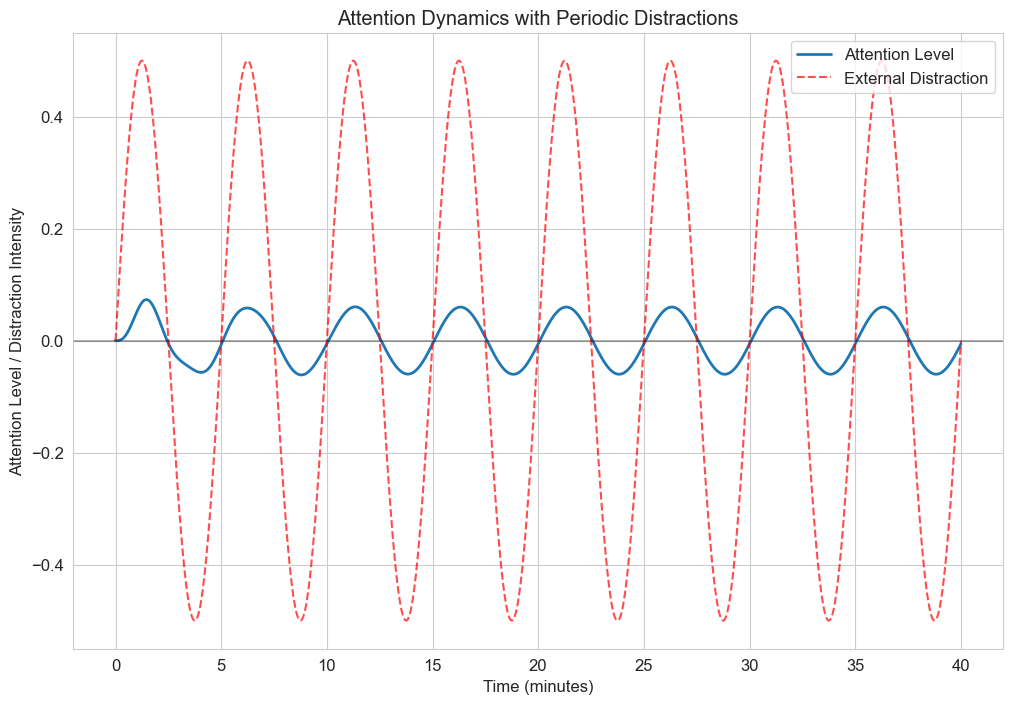

In [8]:
# Forced oscillator model
def forced_oscillator(t, y, zeta, omega, A_force, omega_force):
    """Forced oscillator model with sinusoidal forcing
    y[0] is position x
    y[1] is velocity v = dx/dt
    """
    x, v = y
    # External forcing function: A_force * sin(omega_force * t)
    F = A_force * np.sin(omega_force * t)
    
    dxdt = v
    dvdt = -2 * zeta * omega * v - omega**2 * x + F
    return [dxdt, dvdt]

# Time points
t = np.linspace(0, 40, 1000)

# Initial conditions: [x0, v0]
y0 = [0, 0]  # Start at equilibrium

# System parameters
omega = 2 * np.pi * 0.5  # Natural frequency (0.5 cycles per time unit)
zeta = 0.1  # Damping ratio

# Forcing parameters
A_force = 0.5  # Amplitude of forcing
omega_force = 2 * np.pi * 0.2  # Frequency of forcing (0.2 cycles per time unit)

# Solve the ODE system
solution = solve_ivp(
    lambda t, y: forced_oscillator(t, y, zeta, omega, A_force, omega_force),
    [t[0], t[-1]],
    y0,
    t_eval=t,
    method='RK45'
)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot attention level
plt.plot(solution.t, solution.y[0], label='Attention Level', linewidth=2)

# Plot the forcing function (scaled for visibility)
forcing = A_force * np.sin(omega_force * t)
plt.plot(t, forcing, 'r--', label='External Distraction', linewidth=1.5, alpha=0.7)

plt.title('Attention Dynamics with Periodic Distractions')
plt.xlabel('Time (minutes)')
plt.ylabel('Attention Level / Distraction Intensity')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

## 4. Systems of Differential Equations

Many psychological phenomena involve multiple interacting variables, which can be modeled using systems of differential equations.

### 4.1 Predator-Prey Dynamics (Lotka-Volterra Model)

The Lotka-Volterra equations model the dynamics between two populations:

$$\begin{align}
\frac{dx}{dt} &= \alpha x - \beta xy \\
\frac{dy}{dt} &= \delta xy - \gamma y
\end{align}$$

Where:
- $x$ is the prey population
- $y$ is the predator population
- $\alpha, \beta, \gamma, \delta$ are positive constants

In psychology, similar models can represent:
- Competition between cognitive processes
- Interaction between different emotional states
- Social dynamics between groups
Let's implement and visualize a Lotka-Volterra model for competing psychological processes:

For example, we might model the competition between analytical and intuitive thinking processes, where each can inhibit the other but also has its own growth rate.

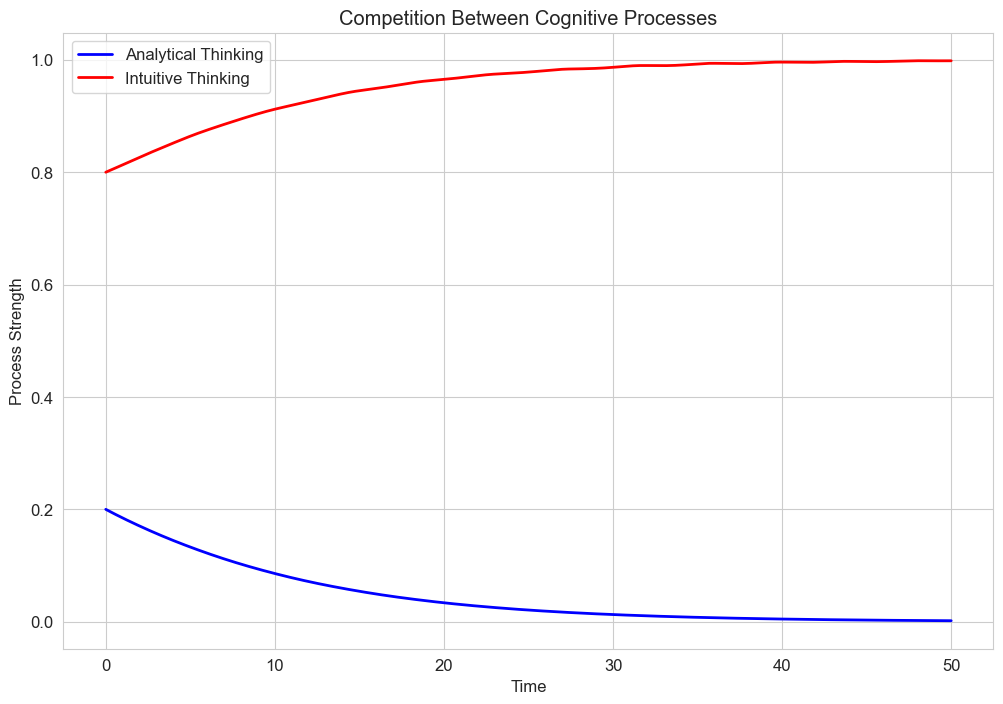

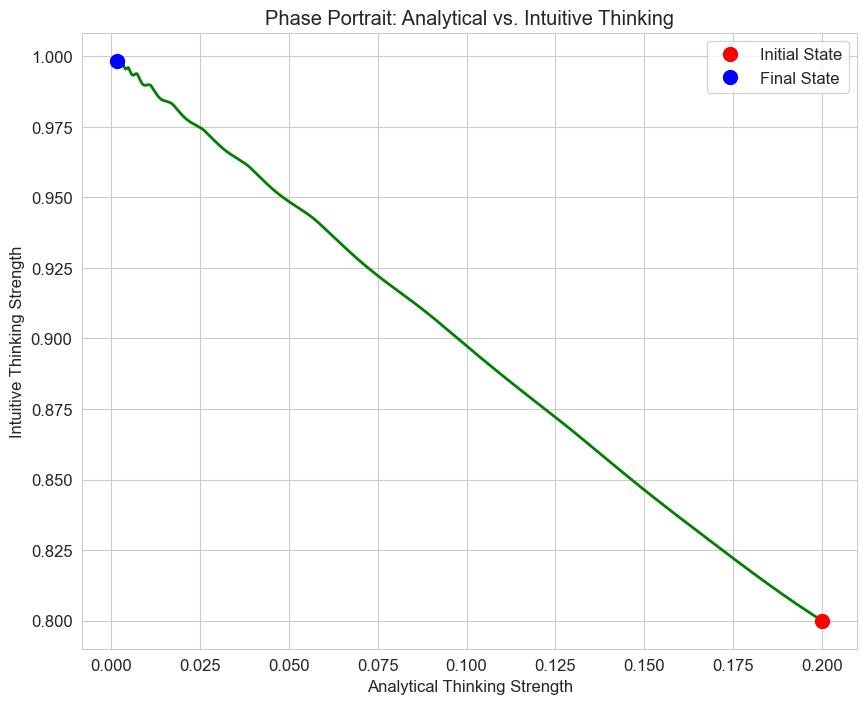

In [9]:
# Lotka-Volterra competition model
def competing_processes(t, y, r1, r2, a12, a21):
    """Lotka-Volterra competition model for two psychological processes
    y[0] is the strength of process 1 (e.g., analytical thinking)
    y[1] is the strength of process 2 (e.g., intuitive thinking)
    r1, r2 are growth rates
    a12 is the inhibitory effect of process 2 on process 1
    a21 is the inhibitory effect of process 1 on process 2
    """
    x1, x2 = y
    dx1dt = r1 * x1 * (1 - x1 - a12 * x2)
    dx2dt = r2 * x2 * (1 - x2 - a21 * x1)
    return [dx1dt, dx2dt]

# Time points
t = np.linspace(0, 50, 1000)

# Initial conditions: [x1_0, x2_0]
y0 = [0.2, 0.8]  # Start with stronger intuitive process

# Parameters
r1 = 0.5  # Growth rate of analytical thinking
r2 = 0.8  # Growth rate of intuitive thinking
a12 = 1.2  # Inhibition of analytical by intuitive
a21 = 0.9  # Inhibition of intuitive by analytical

# Solve the ODE system
solution = solve_ivp(
    lambda t, y: competing_processes(t, y, r1, r2, a12, a21),
    [t[0], t[-1]],
    y0,
    t_eval=t,
    method='RK45'
)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], 'b-', label='Analytical Thinking', linewidth=2)
plt.plot(solution.t, solution.y[1], 'r-', label='Intuitive Thinking', linewidth=2)
plt.title('Competition Between Cognitive Processes')
plt.xlabel('Time')
plt.ylabel('Process Strength')
plt.legend()
plt.grid(True)
plt.show()

# Phase portrait
plt.figure(figsize=(10, 8))
plt.plot(solution.y[0], solution.y[1], 'g-', linewidth=2)
plt.plot(solution.y[0][0], solution.y[1][0], 'ro', markersize=10, label='Initial State')
plt.plot(solution.y[0][-1], solution.y[1][-1], 'bo', markersize=10, label='Final State')
plt.title('Phase Portrait: Analytical vs. Intuitive Thinking')
plt.xlabel('Analytical Thinking Strength')
plt.ylabel('Intuitive Thinking Strength')
plt.legend()
plt.grid(True)
plt.show()

## 5. Systems of Differential Equations in Neuroscience

Neuroscience is a field where differential equations are extensively used to model neural activity, from single neurons to networks. Let's explore some key models.

### 5.1 Hodgkin-Huxley Model

The Hodgkin-Huxley model is a set of nonlinear differential equations that describes how action potentials in neurons are initiated and propagated. It's one of the most important models in computational neuroscience.

The full model is quite complex, involving four coupled differential equations. A simplified version is the FitzHugh-Nagumo model, which captures the essential dynamics with just two variables.

### 5.2 FitzHugh-Nagumo Model

The FitzHugh-Nagumo model is a simplified version of the Hodgkin-Huxley model that captures the essential dynamics of neural excitation and recovery:

$$\frac{dv}{dt} = v - \frac{v^3}{3} - w + I$$
$$\frac{dw}{dt} = \phi(v + a - bw)$$

Where:
- $v$ represents the membrane potential
- $w$ represents a recovery variable
- $I$ is the input current
- $a$, $b$, and $\phi$ are parameters

Let's implement and visualize this model to simulate neural firing patterns:

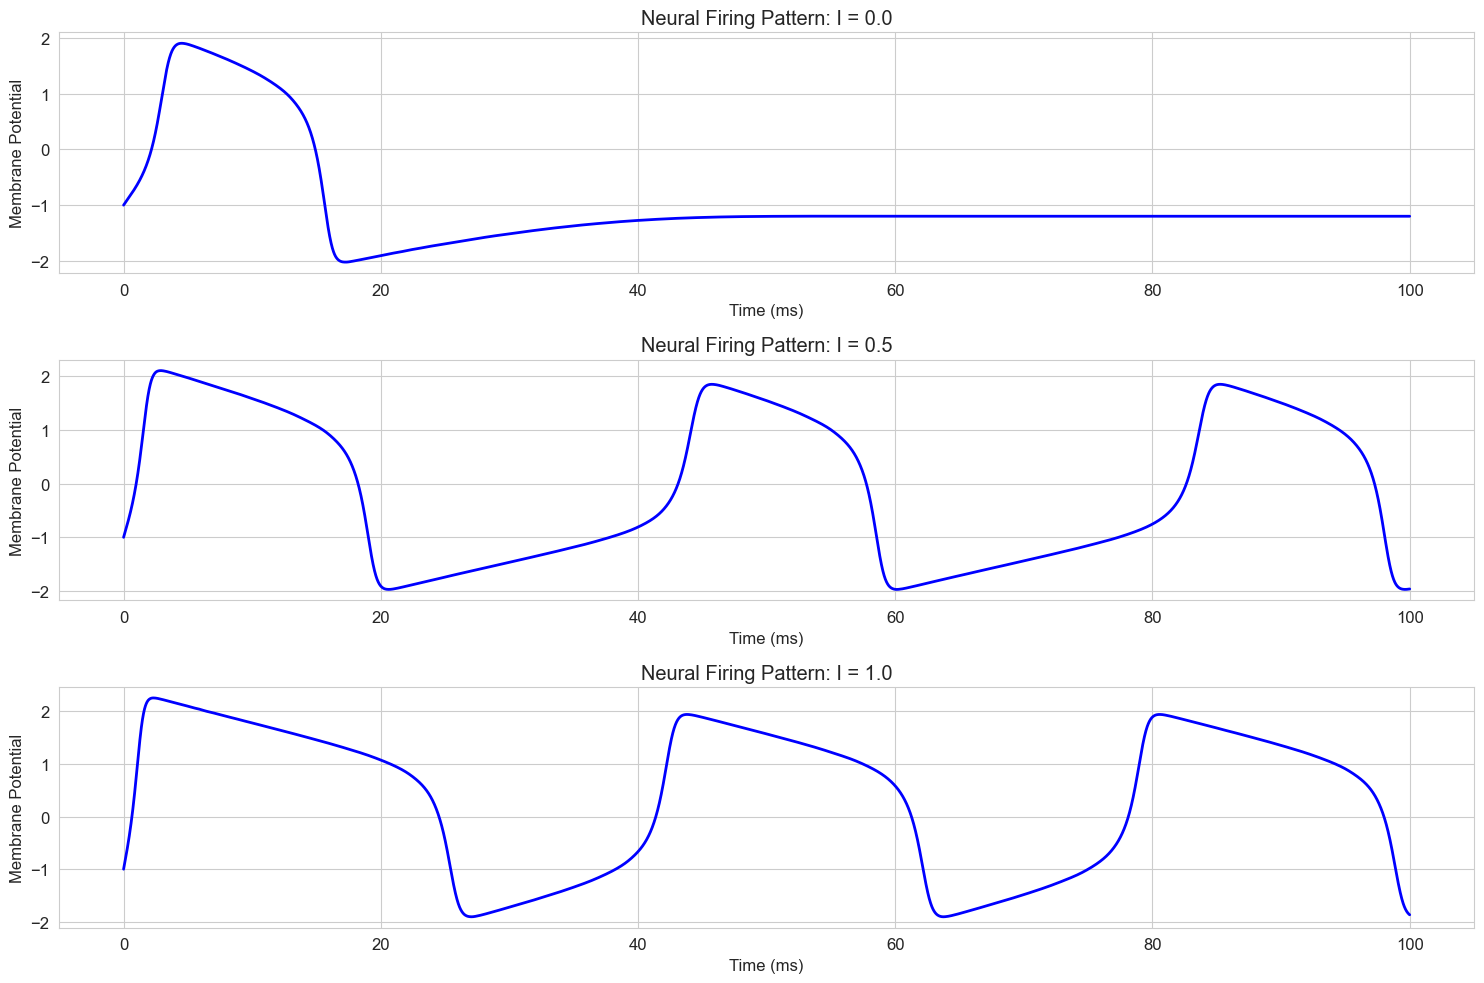

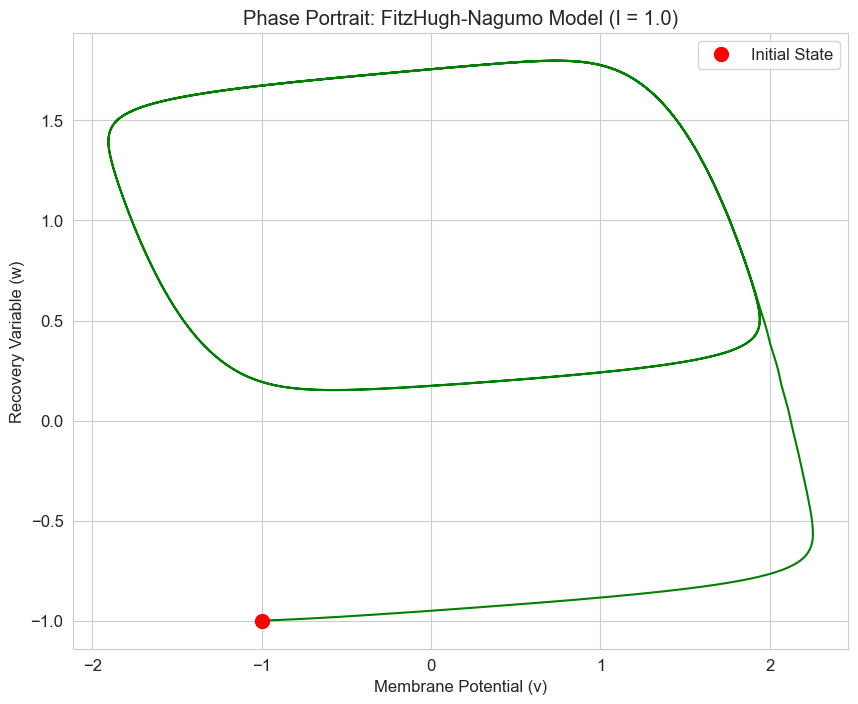

In [10]:
# FitzHugh-Nagumo model
def fitzhugh_nagumo(t, y, a, b, phi, I):
    """FitzHugh-Nagumo model for neural dynamics
    y[0] is v (membrane potential)
    y[1] is w (recovery variable)
    """
    v, w = y
    dvdt = v - v**3/3 - w + I
    dwdt = phi * (v + a - b * w)
    return [dvdt, dwdt]

# Time points
t = np.linspace(0, 100, 10000)

# Initial conditions: [v0, w0]
y0 = [-1, -1]  # Start at rest

# Parameters
a = 0.7
b = 0.8
phi = 0.08
I_values = [0.0, 0.5, 1.0]  # Different input currents
labels = [f'I = {I}' for I in I_values]

plt.figure(figsize=(15, 10))

for i, (I, label) in enumerate(zip(I_values, labels)):
    # Solve the ODE system
    solution = solve_ivp(
        lambda t, y: fitzhugh_nagumo(t, y, a, b, phi, I),
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45'
    )
    
    # Plot the membrane potential
    plt.subplot(3, 1, i+1)
    plt.plot(solution.t, solution.y[0], 'b-', linewidth=2)
    plt.title(f'Neural Firing Pattern: {label}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Phase portrait for the case with I = 1.0
solution = solve_ivp(
    lambda t, y: fitzhugh_nagumo(t, y, a, b, phi, 1.0),
    [t[0], t[-1]],
    y0,
    t_eval=t,
    method='RK45'
)

plt.figure(figsize=(10, 8))
plt.plot(solution.y[0], solution.y[1], 'g-', linewidth=1.5)
plt.plot(solution.y[0][0], solution.y[1][0], 'ro', markersize=10, label='Initial State')
plt.title('Phase Portrait: FitzHugh-Nagumo Model (I = 1.0)')
plt.xlabel('Membrane Potential (v)')
plt.ylabel('Recovery Variable (w)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Neural Population Models

Beyond single neurons, differential equations can model the activity of entire neural populations. The Wilson-Cowan model is a classic example that describes the dynamics of excitatory and inhibitory neural populations.

The Wilson-Cowan equations are:

$$\tau_e \frac{dE}{dt} = -E + (1-rE)S_e(c_{ee}E - c_{ei}I + P)$$
$$\tau_i \frac{dI}{dt} = -I + (1-rI)S_i(c_{ie}E - c_{ii}I + Q)$$

Where:
- $E$ and $I$ are the activities of excitatory and inhibitory populations
- $\tau_e$ and $\tau_i$ are time constants
- $c_{ee}$, $c_{ei}$, $c_{ie}$, and $c_{ii}$ are connection strengths
- $P$ and $Q$ are external inputs
- $S_e$ and $S_i$ are sigmoid functions
- $r$ is a refractory parameter

Let's implement a simplified version of this model:

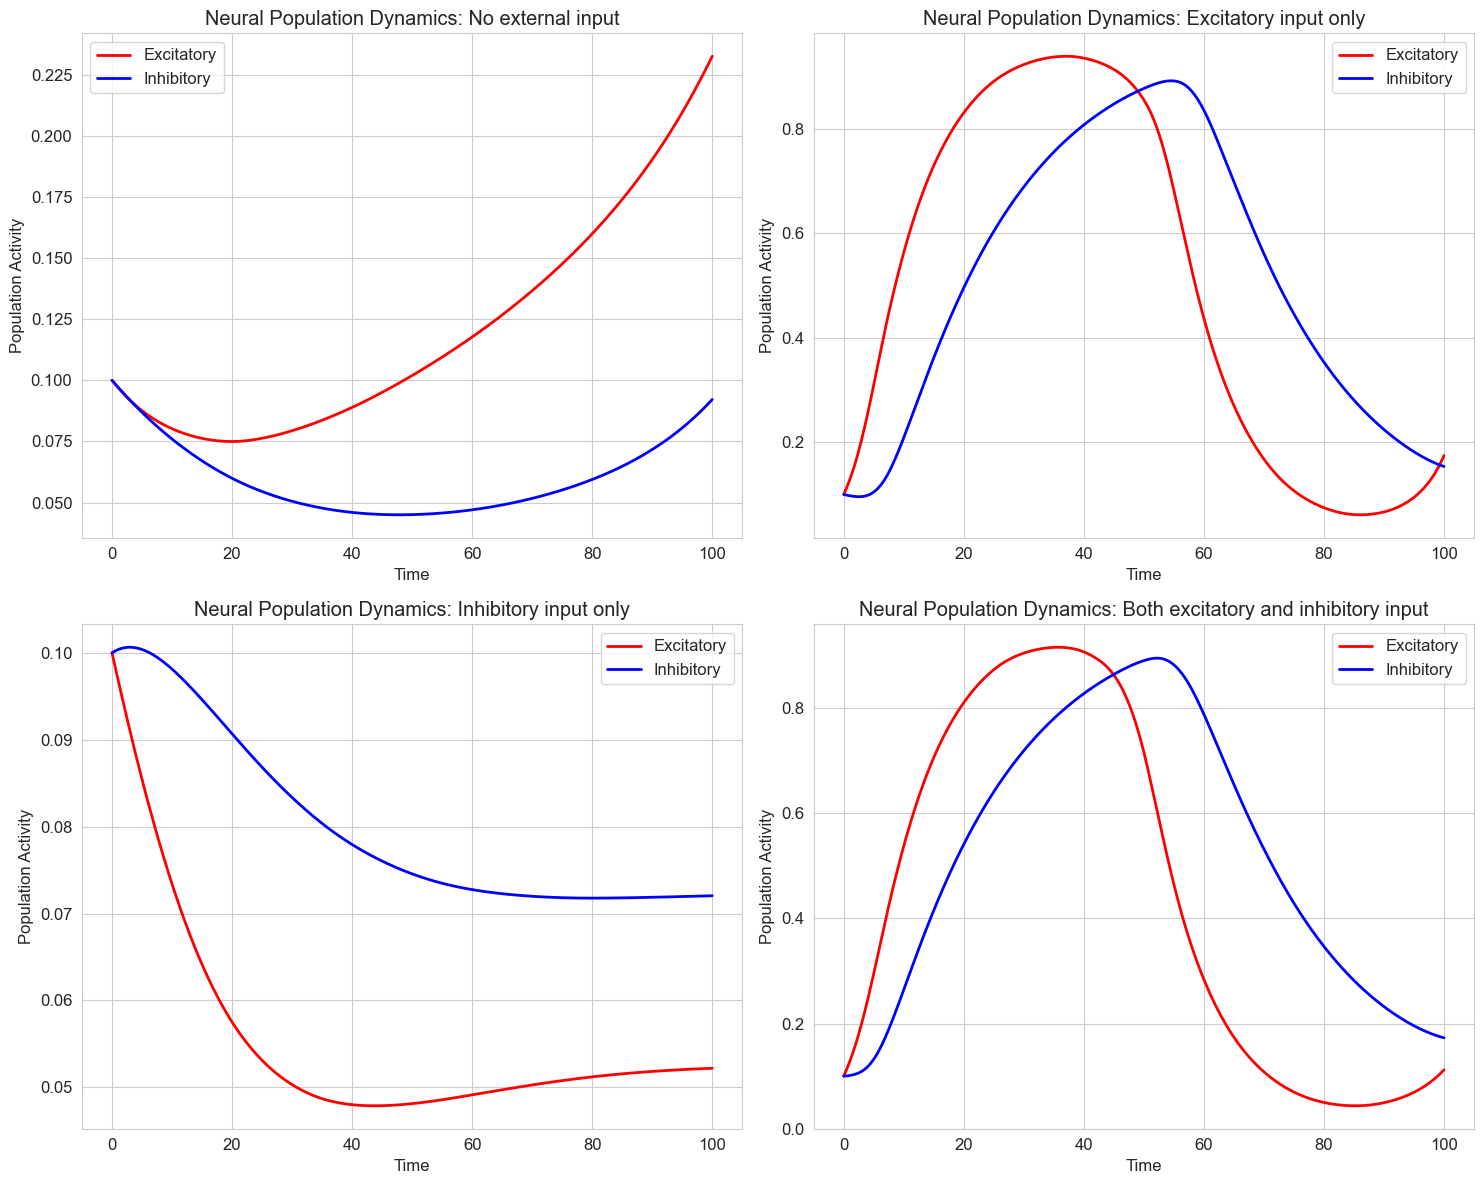

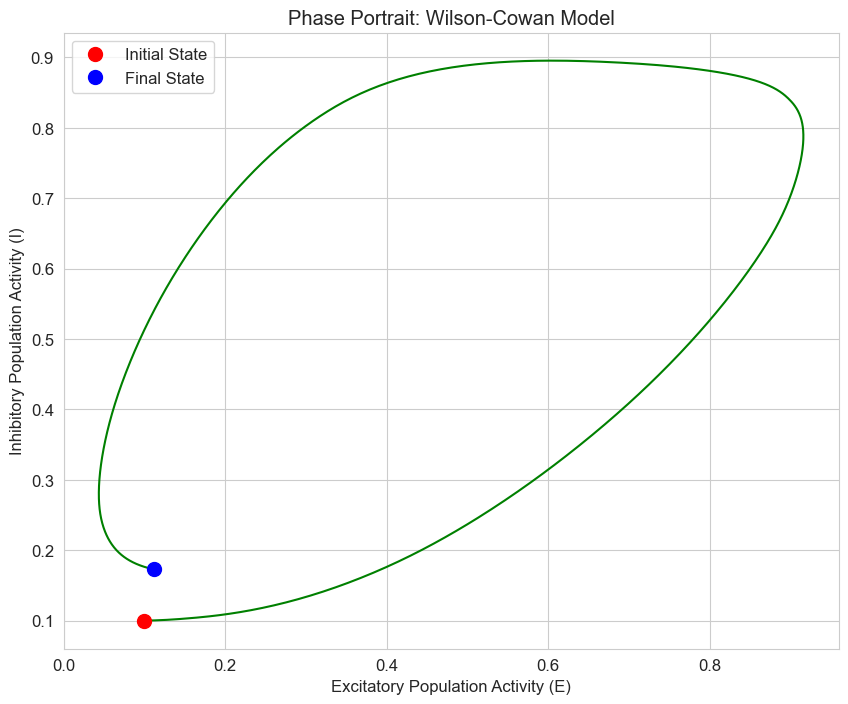

In [11]:
# Sigmoid function
def sigmoid(x, theta, beta):
    """Sigmoid function for neural activation"""
    return 1 / (1 + np.exp(-beta * (x - theta)))

# Wilson-Cowan model
def wilson_cowan(t, y, tau_e, tau_i, c_ee, c_ei, c_ie, c_ii, P, Q, theta_e, theta_i, beta_e, beta_i):
    """Wilson-Cowan model for neural population dynamics
    y[0] is E (excitatory population activity)
    y[1] is I (inhibitory population activity)
    """
    E, I = y
    
    # Calculate inputs to each population
    input_e = c_ee * E - c_ei * I + P
    input_i = c_ie * E - c_ii * I + Q
    
    # Calculate derivatives
    dEdt = (-E + sigmoid(input_e, theta_e, beta_e)) / tau_e
    dIdt = (-I + sigmoid(input_i, theta_i, beta_i)) / tau_i
    
    return [dEdt, dIdt]

# Time points
t = np.linspace(0, 100, 1000)

# Initial conditions: [E0, I0]
y0 = [0.1, 0.1]  # Start with low activity

# Parameters
tau_e = 10.0  # Time constant for excitatory population
tau_i = 20.0  # Time constant for inhibitory population
c_ee = 12.0   # Excitatory to excitatory connection strength
c_ei = 10.0   # Inhibitory to excitatory connection strength
c_ie = 10.0   # Excitatory to inhibitory connection strength
c_ii = 1.0    # Inhibitory to inhibitory connection strength
theta_e = 2.8 # Threshold for excitatory population
theta_i = 4.0 # Threshold for inhibitory population
beta_e = 1.0  # Slope parameter for excitatory sigmoid
beta_i = 1.0  # Slope parameter for inhibitory sigmoid

# Different external inputs
input_scenarios = [
    (0.0, 0.0, 'No external input'),
    (2.0, 0.0, 'Excitatory input only'),
    (0.0, 1.0, 'Inhibitory input only'),
    (2.0, 1.0, 'Both excitatory and inhibitory input')
]

plt.figure(figsize=(15, 12))

for i, (P, Q, title) in enumerate(input_scenarios):
    # Solve the ODE system
    solution = solve_ivp(
        lambda t, y: wilson_cowan(t, y, tau_e, tau_i, c_ee, c_ei, c_ie, c_ii, P, Q, theta_e, theta_i, beta_e, beta_i),
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45'
    )
    
    # Plot the population activities
    plt.subplot(2, 2, i+1)
    plt.plot(solution.t, solution.y[0], 'r-', label='Excitatory', linewidth=2)
    plt.plot(solution.t, solution.y[1], 'b-', label='Inhibitory', linewidth=2)
    plt.title(f'Neural Population Dynamics: {title}')
    plt.xlabel('Time')
    plt.ylabel('Population Activity')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Phase portrait for the case with both inputs
P, Q = 2.0, 1.0
solution = solve_ivp(
    lambda t, y: wilson_cowan(t, y, tau_e, tau_i, c_ee, c_ei, c_ie, c_ii, P, Q, theta_e, theta_i, beta_e, beta_i),
    [t[0], t[-1]],
    y0,
    t_eval=t,
    method='RK45'
)

plt.figure(figsize=(10, 8))
plt.plot(solution.y[0], solution.y[1], 'g-', linewidth=1.5)
plt.plot(solution.y[0][0], solution.y[1][0], 'ro', markersize=10, label='Initial State')
plt.plot(solution.y[0][-1], solution.y[1][-1], 'bo', markersize=10, label='Final State')
plt.title('Phase Portrait: Wilson-Cowan Model')
plt.xlabel('Excitatory Population Activity (E)')
plt.ylabel('Inhibitory Population Activity (I)')
plt.legend()
plt.grid(True)
plt.show()

## 6. Applications in Cognitive Psychology

Differential equations have been applied to various areas of cognitive psychology, including attention, decision-making, and learning. Let's explore some examples.

### 6.1 Drift Diffusion Model for Decision Making

The Drift Diffusion Model (DDM) is a popular model for two-choice decision tasks. It models the decision process as the accumulation of noisy evidence over time until a decision threshold is reached.

The basic equation is:

$$dx = v \cdot dt + s \cdot dW$$

Where:
- $x$ is the accumulated evidence
- $v$ is the drift rate (quality of information)
- $s$ is the noise coefficient
- $dW$ is a Wiener process (random noise)

Let's implement a simplified version of this model:

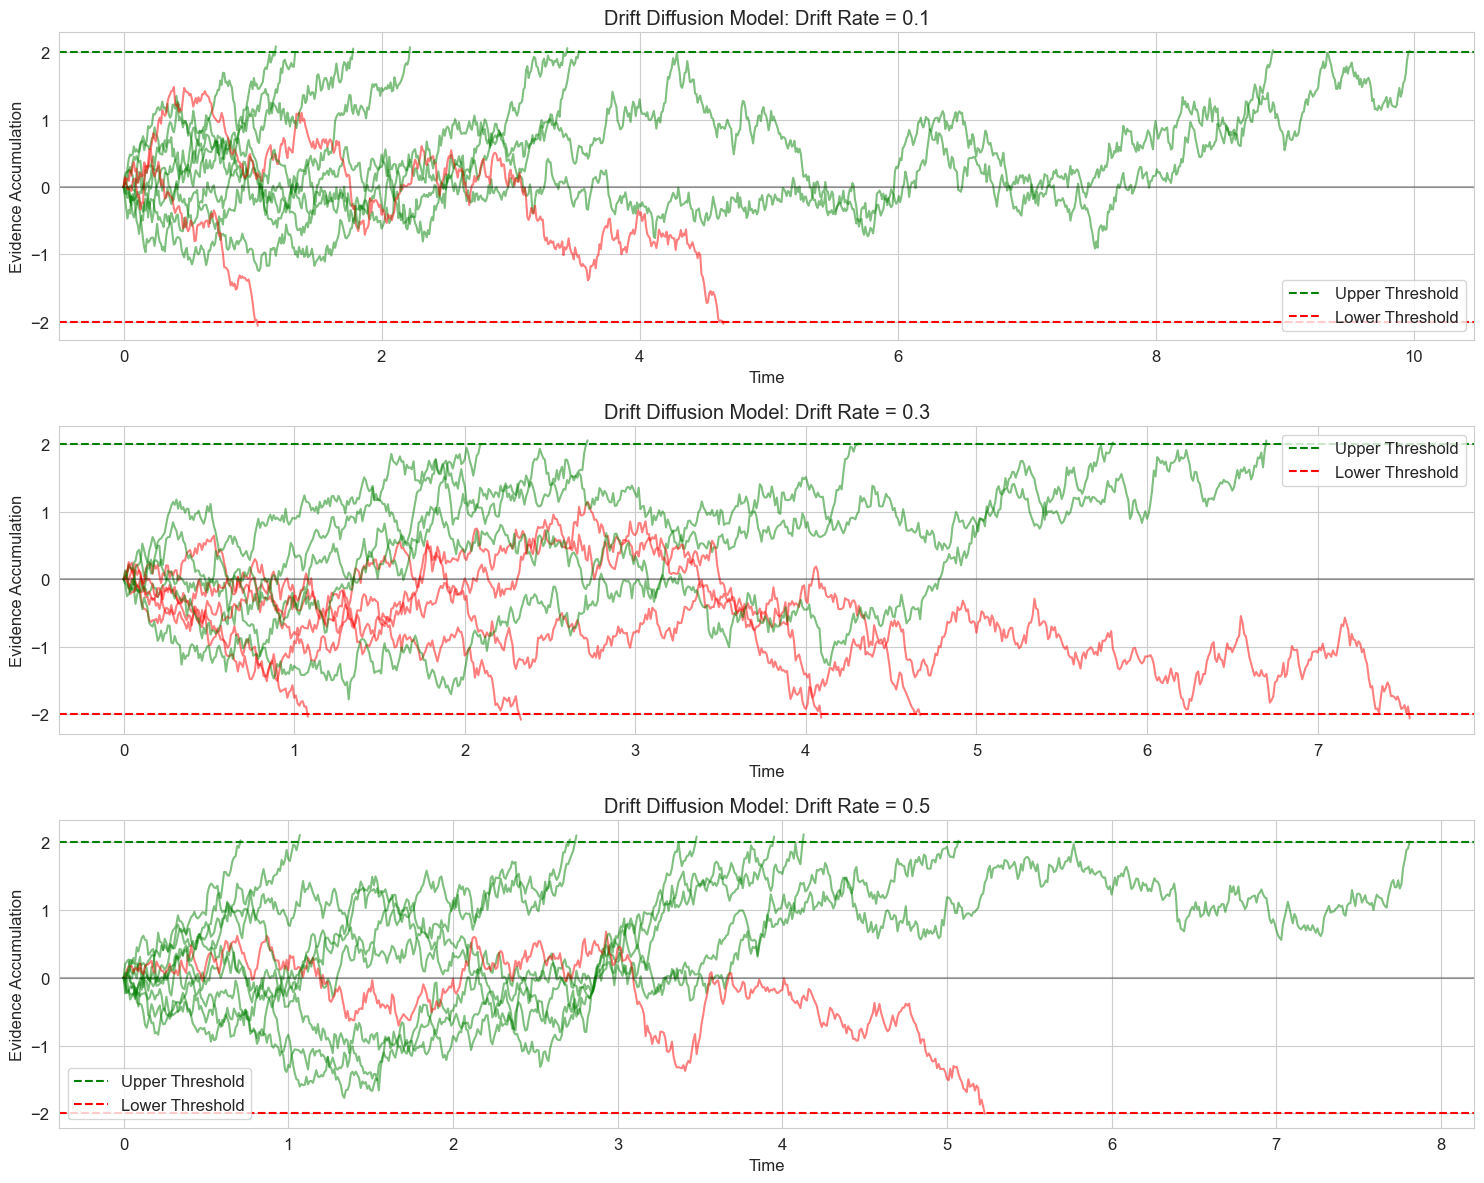

Drift Diffusion Model Results:
   drift_rate  mean_rt  median_rt  accuracy
0         0.1  4.01846      3.265     0.560
1         0.3  3.60535      2.790     0.729
2         0.5  3.22138      2.650     0.854


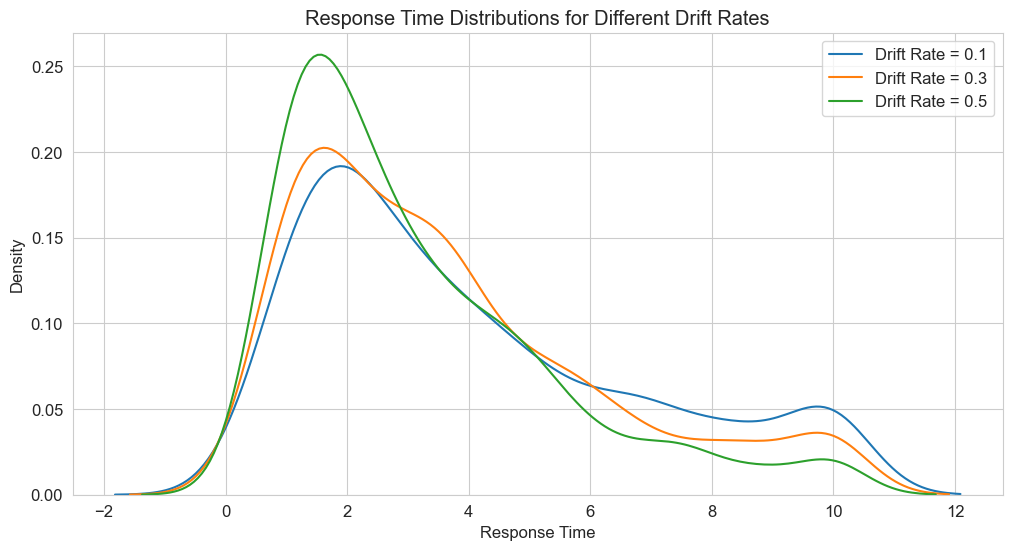

In [12]:
# Drift Diffusion Model simulation
def simulate_ddm(drift_rate, threshold, noise_sd, dt=0.01, max_time=10.0):
    """Simulate a drift diffusion process
    
    Parameters:
    drift_rate: Quality of information (higher = easier decision)
    threshold: Decision boundary (higher = more cautious)
    noise_sd: Standard deviation of noise (higher = more variable)
    dt: Time step
    max_time: Maximum simulation time
    
    Returns:
    times: Array of time points
    positions: Array of evidence accumulation positions
    decision: Final decision (1 or -1)
    rt: Response time
    """
    # Initialize
    times = [0]
    positions = [0]  # Start at zero evidence
    t = 0
    
    while t < max_time:
        # Update time
        t += dt
        times.append(t)
        
        # Calculate noise term
        noise = noise_sd * np.random.normal(0, 1) * np.sqrt(dt)
        
        # Update position
        new_position = positions[-1] + drift_rate * dt + noise
        positions.append(new_position)
        
        # Check if a threshold is reached
        if new_position >= threshold:
            return np.array(times), np.array(positions), 1, t  # Upper threshold
        elif new_position <= -threshold:
            return np.array(times), np.array(positions), -1, t  # Lower threshold
    
    # If max_time is reached without a decision
    return np.array(times), np.array(positions), 0, max_time

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
drift_rates = [0.1, 0.3, 0.5]  # Different drift rates
threshold = 2.0  # Decision threshold
noise_sd = 1.0  # Noise standard deviation
n_trials = 10  # Number of trials to simulate for each drift rate

# Create figure
plt.figure(figsize=(15, 12))

for i, drift_rate in enumerate(drift_rates):
    plt.subplot(3, 1, i+1)
    
    # Simulate multiple trials
    for trial in range(n_trials):
        times, positions, decision, rt = simulate_ddm(drift_rate, threshold, noise_sd)
        
        # Plot the evidence accumulation path
        if decision == 1:
            plt.plot(times, positions, 'g-', alpha=0.5)  # Green for upper threshold
        elif decision == -1:
            plt.plot(times, positions, 'r-', alpha=0.5)  # Red for lower threshold
        else:
            plt.plot(times, positions, 'k-', alpha=0.5)  # Black for no decision
    
    # Plot thresholds
    plt.axhline(y=threshold, color='g', linestyle='--', label='Upper Threshold')
    plt.axhline(y=-threshold, color='r', linestyle='--', label='Lower Threshold')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    plt.title(f'Drift Diffusion Model: Drift Rate = {drift_rate}')
    plt.xlabel('Time')
    plt.ylabel('Evidence Accumulation')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Simulate many trials and analyze response times
n_trials = 1000
results = []

for drift_rate in drift_rates:
    rts = []
    decisions = []
    
    for _ in range(n_trials):
        _, _, decision, rt = simulate_ddm(drift_rate, threshold, noise_sd)
        rts.append(rt)
        decisions.append(decision)
    
    # Calculate accuracy
    accuracy = np.mean([d == 1 for d in decisions])  # Assuming drift > 0 means correct = upper threshold
    
    results.append({
        'drift_rate': drift_rate,
        'mean_rt': np.mean(rts),
        'median_rt': np.median(rts),
        'accuracy': accuracy
    })

# Display results
results_df = pd.DataFrame(results)
print("Drift Diffusion Model Results:")
print(results_df)

# Plot RT distributions
plt.figure(figsize=(12, 6))

for drift_rate in drift_rates:
    rts = []
    for _ in range(n_trials):
        _, _, _, rt = simulate_ddm(drift_rate, threshold, noise_sd)
        rts.append(rt)
    
    sns.kdeplot(rts, label=f'Drift Rate = {drift_rate}')

plt.title('Response Time Distributions for Different Drift Rates')
plt.xlabel('Response Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### 6.2 Dynamic Models of Attention

Attention can be modeled as a dynamic process that changes over time. One approach is to use differential equations to model how attention is allocated to different stimuli.

A simple model of attention allocation might be:

$$\frac{da_i}{dt} = \alpha S_i - \beta a_i - \gamma \sum_{j \neq i} a_j$$

Where:
- $a_i$ is the attention allocated to stimulus $i$
- $S_i$ is the salience of stimulus $i$
- $\alpha$ is the rate of attention capture
- $\beta$ is the rate of attention decay
- $\gamma$ is the inhibition from other stimuli

Let's implement this model for a scenario with multiple competing stimuli:

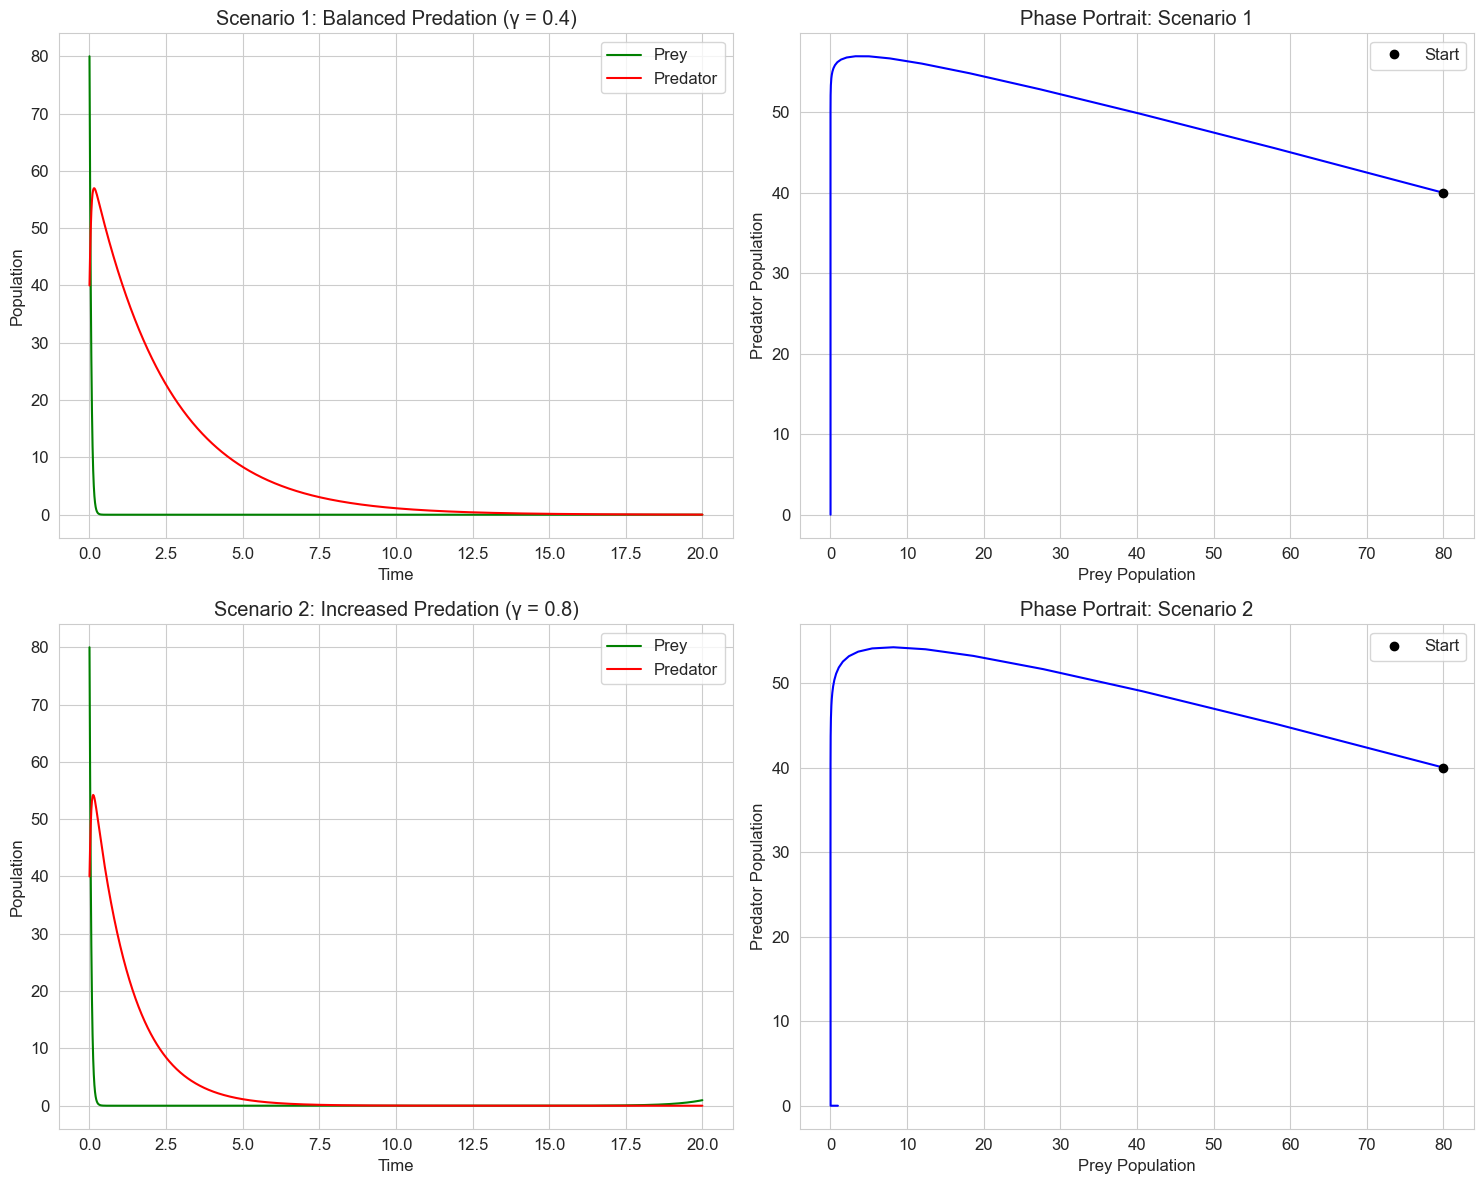

In [13]:
def lotka_volterra(t, y, alpha, beta, delta, gamma):
    """Lotka-Volterra predator-prey model
    y[0] is prey population
    y[1] is predator population
    """
    prey, predator = y
    dprey_dt = alpha * prey - beta * prey * predator
    dpredator_dt = delta * prey * predator - gamma * predator
    return [dprey_dt, dpredator_dt]
# Dynamic attention allocation model
def attention_dynamics(t, a, alpha, beta, gamma, salience):
    """Model of dynamic attention allocation
    a is a vector of attention values for each stimulus
    salience is a vector of salience values for each stimulus
    """
    n = len(a)
    da_dt = np.zeros(n)
    
    for i in range(n):
        # Attention capture by stimulus salience
        capture = alpha * salience[i]
        
        # Attention decay
        decay = beta * a[i]
        
        # Inhibition from other stimuli
        inhibition = gamma * sum(a[j] for j in range(n) if j != i)
        
        # Net change in attention
        da_dt[i] = capture - decay - inhibition
    
    return da_dt

# Time points
t = np.linspace(0, 20, 1000)

# Parameters
alpha = 0.5  # Attention capture rate
beta = 0.2   # Attention decay rate
gamma = 0.1  # Inhibition rate

# Scenario 1: Three stimuli with equal salience
salience1 = np.array([1.0, 1.0, 1.0])
a0_1 = np.array([0.1, 0.1, 0.1])  # Initial attention

# Scenario 2: Three stimuli with one highly salient
salience2 = np.array([2.0, 0.5, 0.5])
a0_2 = np.array([0.1, 0.1, 0.1])  # Initial attention

# Scenario 3: Three stimuli with changing salience over time
def time_varying_salience(t):
    """Salience that changes over time"""
    s1 = 1.0 + 0.5 * np.sin(0.5 * t)  # Oscillating salience
    s2 = 0.5 + 0.5 * (t > 10)  # Step increase at t=10
    s3 = 1.0 * np.exp(-0.1 * t)  # Decaying salience
    return np.array([s1, s2, s3])

# Solve for scenario 1
solution1 = solve_ivp(
    lambda t, y: lotka_volterra(t, y, alpha=1.1, beta=0.4, delta=0.1, gamma=0.4),
    [t[0], t[-1]],
    [80, 40],  # Initial populations: 80 prey, 40 predators
    t_eval=t,
    method='RK45'
)

# Solve for scenario 2
solution2 = solve_ivp(
    lambda t, y: lotka_volterra(t, y, alpha=1.1, beta=0.4, delta=0.1, gamma=0.8),
    [t[0], t[-1]],
    [80, 40],  # Same initial populations
    t_eval=t,
    method='RK45'
)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot time series for scenario 1
axs[0, 0].plot(solution1.t, solution1.y[0], 'g-', label='Prey')
axs[0, 0].plot(solution1.t, solution1.y[1], 'r-', label='Predator')
axs[0, 0].set_title('Scenario 1: Balanced Predation (γ = 0.4)')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Population')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot phase portrait for scenario 1
axs[0, 1].plot(solution1.y[0], solution1.y[1], 'b-')
axs[0, 1].plot(solution1.y[0][0], solution1.y[1][0], 'ko', label='Start')
axs[0, 1].set_title('Phase Portrait: Scenario 1')
axs[0, 1].set_xlabel('Prey Population')
axs[0, 1].set_ylabel('Predator Population')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot time series for scenario 2
axs[1, 0].plot(solution2.t, solution2.y[0], 'g-', label='Prey')
axs[1, 0].plot(solution2.t, solution2.y[1], 'r-', label='Predator')
axs[1, 0].set_title('Scenario 2: Increased Predation (γ = 0.8)')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Population')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot phase portrait for scenario 2
axs[1, 1].plot(solution2.y[0], solution2.y[1], 'b-')
axs[1, 1].plot(solution2.y[0][0], solution2.y[1][0], 'ko', label='Start')
axs[1, 1].set_title('Phase Portrait: Scenario 2')
axs[1, 1].set_xlabel('Prey Population')
axs[1, 1].set_ylabel('Predator Population')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In psychology, similar models can represent:
- Competition between cognitive processes
- Interaction between different emotional states
- Social dynamics between groups

Let's apply this to a psychological example: the interaction between positive and negative thoughts in a cognitive-behavioral therapy context.

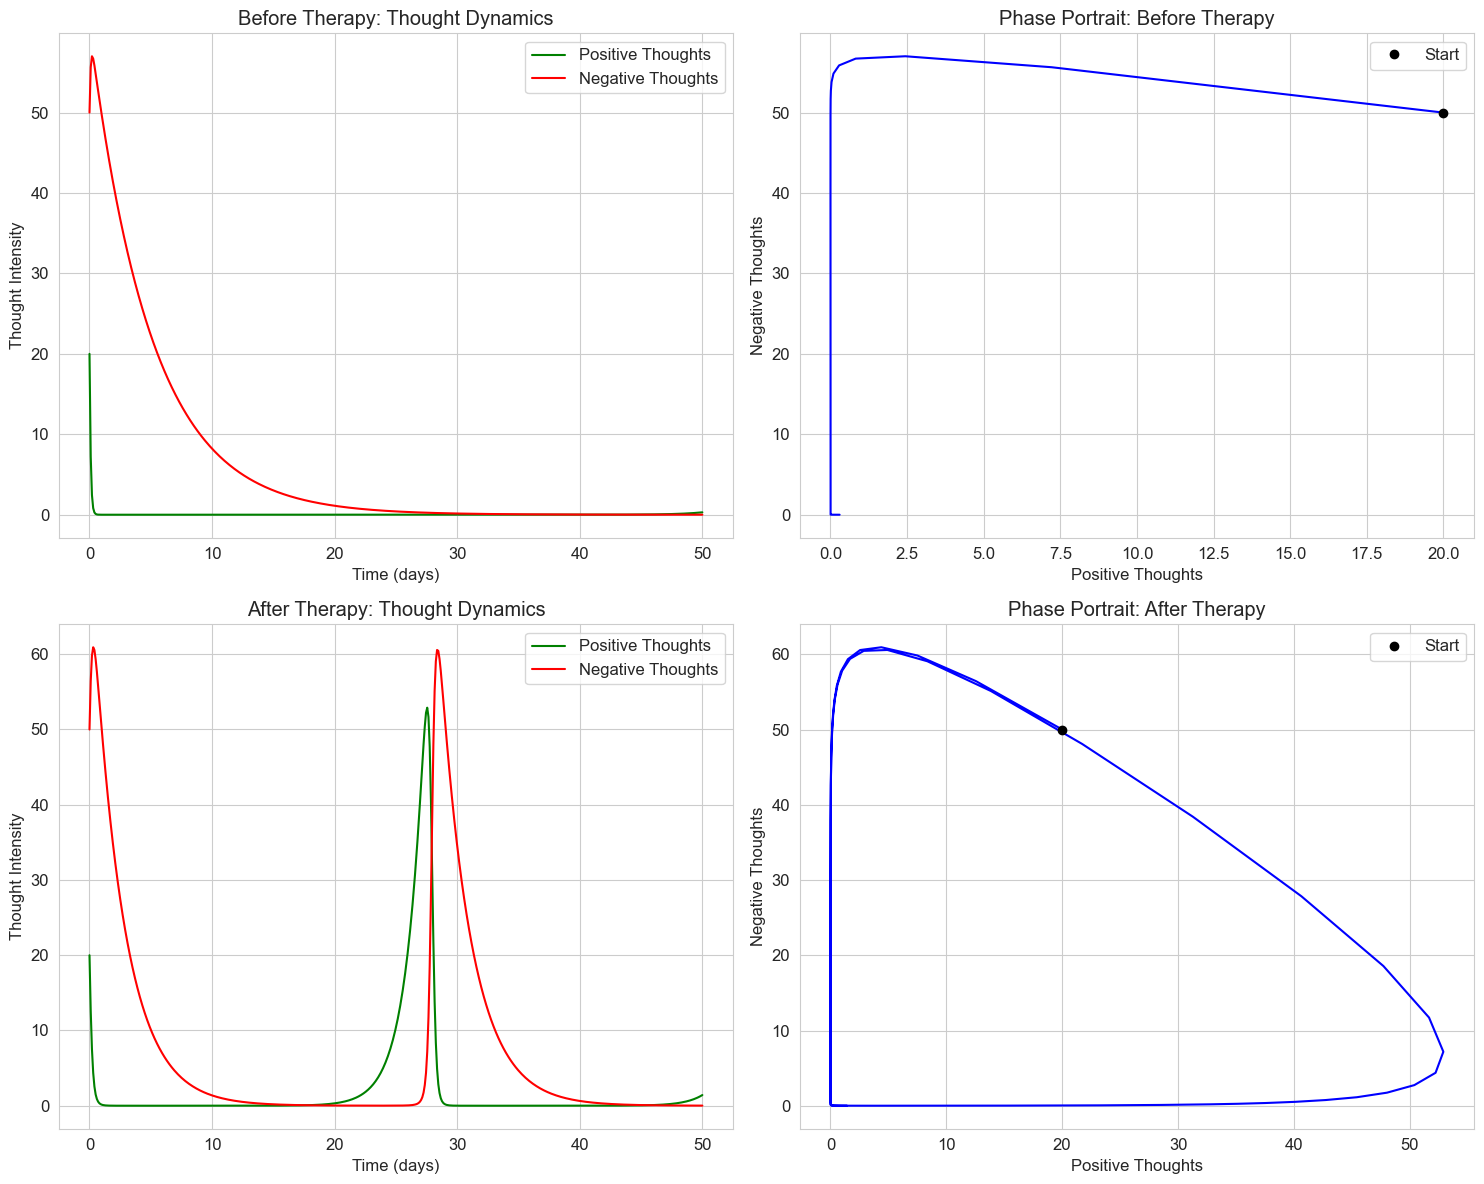

In [14]:
# Cognitive-emotional interaction model
def cognitive_emotional_dynamics(t, y, a, b, c, d):
    """Model for interaction between positive and negative thoughts
    y[0]: Positive thoughts
    y[1]: Negative thoughts
    
    Parameters:
    a: Growth rate of positive thoughts
    b: Rate at which negative thoughts suppress positive ones
    c: Decay rate of negative thoughts
    d: Rate at which positive thoughts reduce negative ones
    """
    positive, negative = y
    dPositive_dt = a * positive - b * positive * negative
    dNegative_dt = -c * negative + d * positive * negative
    return [dPositive_dt, dNegative_dt]

# Time points
t = np.linspace(0, 50, 500)

# Scenario 1: Before therapy (negative thoughts dominate)
before_therapy = solve_ivp(
    lambda t, y: cognitive_emotional_dynamics(t, y, a=0.5, b=0.2, c=0.2, d=0.1),
    [t[0], t[-1]],
    [20, 50],  # Initial: low positive, high negative
    t_eval=t,
    method='RK45'
)

# Scenario 2: After therapy (improved positive thinking)
after_therapy = solve_ivp(
    lambda t, y: cognitive_emotional_dynamics(t, y, a=0.7, b=0.1, c=0.4, d=0.1),
    [t[0], t[-1]],
    [20, 50],  # Same initial conditions
    t_eval=t,
    method='RK45'
)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot time series for before therapy
axs[0, 0].plot(before_therapy.t, before_therapy.y[0], 'g-', label='Positive Thoughts')
axs[0, 0].plot(before_therapy.t, before_therapy.y[1], 'r-', label='Negative Thoughts')
axs[0, 0].set_title('Before Therapy: Thought Dynamics')
axs[0, 0].set_xlabel('Time (days)')
axs[0, 0].set_ylabel('Thought Intensity')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot phase portrait for before therapy
axs[0, 1].plot(before_therapy.y[0], before_therapy.y[1], 'b-')
axs[0, 1].plot(before_therapy.y[0][0], before_therapy.y[1][0], 'ko', label='Start')
axs[0, 1].set_title('Phase Portrait: Before Therapy')
axs[0, 1].set_xlabel('Positive Thoughts')
axs[0, 1].set_ylabel('Negative Thoughts')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot time series for after therapy
axs[1, 0].plot(after_therapy.t, after_therapy.y[0], 'g-', label='Positive Thoughts')
axs[1, 0].plot(after_therapy.t, after_therapy.y[1], 'r-', label='Negative Thoughts')
axs[1, 0].set_title('After Therapy: Thought Dynamics')
axs[1, 0].set_xlabel('Time (days)')
axs[1, 0].set_ylabel('Thought Intensity')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot phase portrait for after therapy
axs[1, 1].plot(after_therapy.y[0], after_therapy.y[1], 'b-')
axs[1, 1].plot(after_therapy.y[0][0], after_therapy.y[1][0], 'ko', label='Start')
axs[1, 1].set_title('Phase Portrait: After Therapy')
axs[1, 1].set_xlabel('Positive Thoughts')
axs[1, 1].set_ylabel('Negative Thoughts')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 5. Neural Models: The Hodgkin-Huxley Equations

The Hodgkin-Huxley model is a set of nonlinear differential equations that describes how action potentials in neurons are initiated and propagated. It's one of the most important models in computational neuroscience.

The full model is quite complex, involving four coupled differential equations. For simplicity, we'll implement a reduced version that captures the essential dynamics of neural firing.

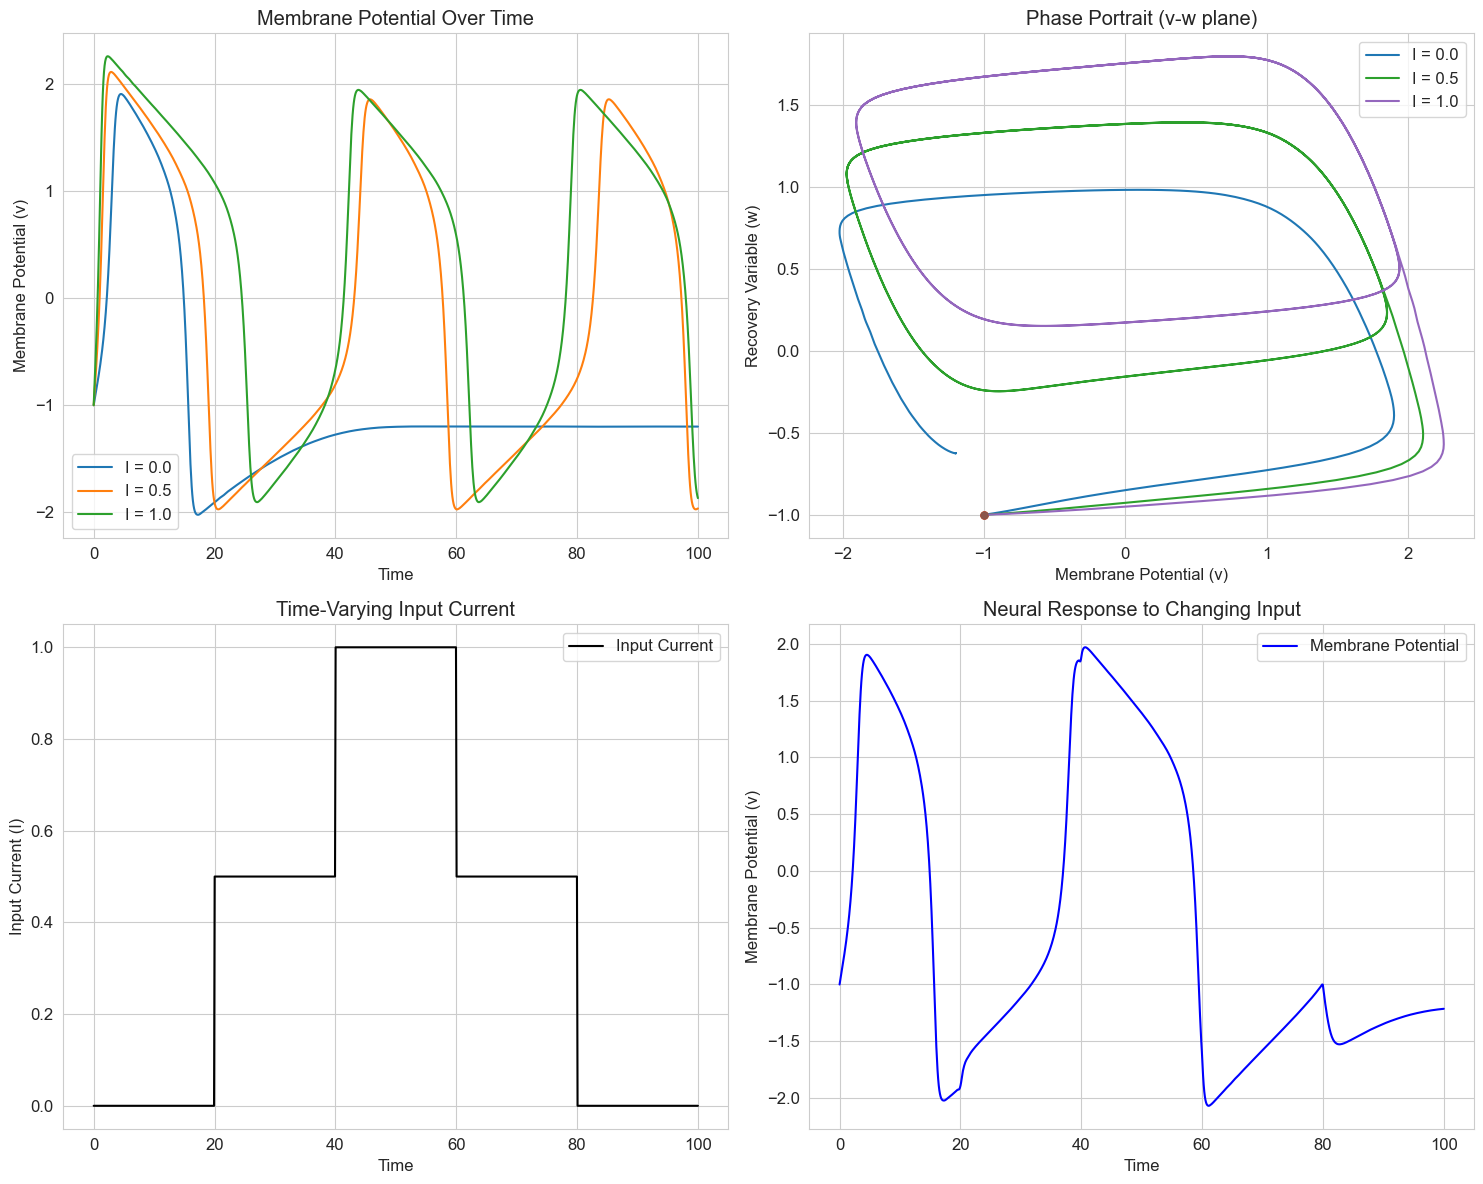

In [15]:
# Simplified Hodgkin-Huxley model (FitzHugh-Nagumo model)
def fitzhugh_nagumo(t, y, a=0.7, b=0.8, tau=12.5, I=0.5):
    """FitzHugh-Nagumo model of neural dynamics
    y[0]: v - membrane potential
    y[1]: w - recovery variable
    
    Parameters:
    a, b: Model parameters
    tau: Time scale separation
    I: Input current
    """
    v, w = y
    dv_dt = v - v**3/3 - w + I
    dw_dt = (v + a - b * w) / tau
    return [dv_dt, dw_dt]

# Time points
t = np.linspace(0, 100, 1000)

# Initial conditions: [v0, w0]
y0 = [-1, -1]  # Start at rest

# Different input currents
currents = [0.0, 0.5, 1.0]
labels = [f'I = {I}' for I in currents]

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot time series for different input currents
for I, label in zip(currents, labels):
    # Solve the ODE system
    solution = solve_ivp(
        lambda t, y: fitzhugh_nagumo(t, y, I=I),
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45'
    )
    
    # Plot membrane potential
    axs[0, 0].plot(solution.t, solution.y[0], label=label)
    
    # Plot phase portrait
    axs[0, 1].plot(solution.y[0], solution.y[1], label=label)
    axs[0, 1].plot(solution.y[0][0], solution.y[1][0], 'o', markersize=5)

# Simulate a neuron with changing input current
def time_varying_input(t):
    """Time-varying input current"""
    if t < 20:
        return 0.0  # No input initially
    elif t < 40:
        return 0.5  # Moderate input
    elif t < 60:
        return 1.0  # Strong input
    elif t < 80:
        return 0.5  # Back to moderate
    else:
        return 0.0  # Back to rest

# Solve with time-varying input
def fitzhugh_nagumo_varying(t, y, a=0.7, b=0.8, tau=12.5):
    """FitzHugh-Nagumo with time-varying input"""
    I = time_varying_input(t)
    return fitzhugh_nagumo(t, y, a, b, tau, I)

varying_solution = solve_ivp(
    fitzhugh_nagumo_varying,
    [t[0], t[-1]],
    y0,
    t_eval=t,
    method='RK45'
)

# Plot time-varying input
input_current = np.array([time_varying_input(t_i) for t_i in varying_solution.t])
axs[1, 0].plot(varying_solution.t, input_current, 'k-', label='Input Current')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Input Current (I)')
axs[1, 0].set_title('Time-Varying Input Current')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot response to time-varying input
axs[1, 1].plot(varying_solution.t, varying_solution.y[0], 'b-', label='Membrane Potential')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Membrane Potential (v)')
axs[1, 1].set_title('Neural Response to Changing Input')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Set titles and labels for the first row
axs[0, 0].set_title('Membrane Potential Over Time')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Membrane Potential (v)')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].set_title('Phase Portrait (v-w plane)')
axs[0, 1].set_xlabel('Membrane Potential (v)')
axs[0, 1].set_ylabel('Recovery Variable (w)')
axs[0, 1].grid(True)
axs[0, 1].legend()

plt.tight_layout()
plt.show()

## 6. Applications in Cognitive Psychology

Differential equations have been applied to various areas of cognitive psychology, including attention, decision-making, and learning. Let's explore a few examples.

### 6.1 Drift Diffusion Model of Decision Making

The drift diffusion model is a popular mathematical framework for modeling decision-making processes. It describes how evidence accumulates over time until a decision threshold is reached.

The basic equation is:

$$\frac{dx}{dt} = \mu + \sigma \xi(t)$$

Where:
- $x$ is the accumulated evidence
- $\mu$ is the drift rate (strength of evidence)
- $\sigma$ is the noise level
- $\xi(t)$ is Gaussian white noise

Let's implement and visualize this model for a simple decision-making task:

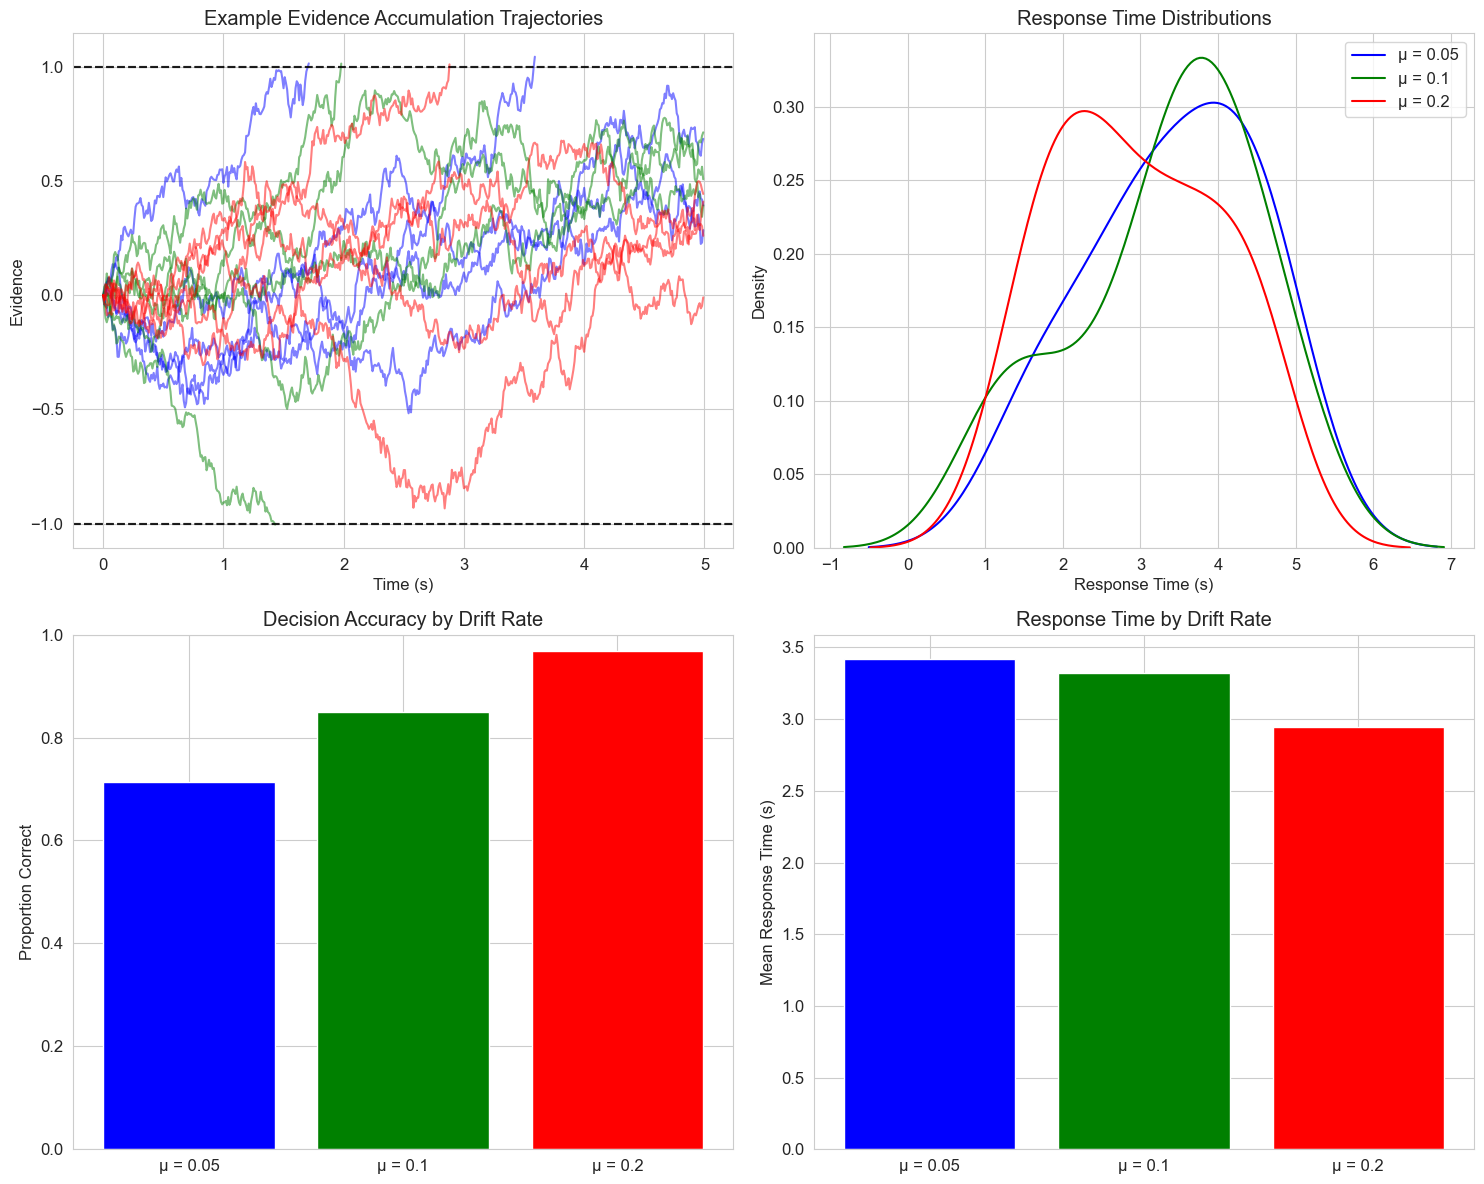

In [16]:
# Drift diffusion model simulation
def drift_diffusion_trial(drift_rate, noise, threshold, max_time=5.0, dt=0.01):
    """Simulate a single trial of the drift diffusion model
    
    Parameters:
    drift_rate: Strength of evidence (μ)
    noise: Noise level (σ)
    threshold: Decision threshold
    max_time: Maximum simulation time
    dt: Time step
    
    Returns:
    times: Array of time points
    positions: Array of evidence accumulation
    decision: Final decision (1 for upper threshold, -1 for lower threshold, 0 for timeout)
    rt: Response time
    """
    # Initialize
    times = np.arange(0, max_time, dt)
    positions = np.zeros_like(times)
    position = 0
    
    # Simulate evidence accumulation
    for i, t in enumerate(times[1:], 1):
        # Update position with drift and noise
        position += drift_rate * dt + noise * np.sqrt(dt) * np.random.normal()
        positions[i] = position
        
        # Check if a threshold is reached
        if position >= threshold:
            return times[:i+1], positions[:i+1], 1, t
        elif position <= -threshold:
            return times[:i+1], positions[:i+1], -1, t
    
    # If no threshold is reached within max_time
    return times, positions, 0, max_time

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
threshold = 1.0
noise = 0.3

# Different drift rates representing different evidence strengths
drift_rates = [0.05, 0.1, 0.2]
labels = [f'μ = {mu}' for mu in drift_rates]
colors = ['blue', 'green', 'red']

# Number of trials to simulate for each condition
n_trials = 50

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot example trajectories
for j, (drift_rate, label, color) in enumerate(zip(drift_rates, labels, colors)):
    # Simulate a few example trajectories
    for i in range(5):  # 5 example trajectories per condition
        times, positions, decision, rt = drift_diffusion_trial(drift_rate, noise, threshold)
        axs[0, 0].plot(times, positions, color=color, alpha=0.5)
    
    # Add horizontal lines for thresholds
    axs[0, 0].axhline(y=threshold, color='black', linestyle='--', alpha=0.5)
    axs[0, 0].axhline(y=-threshold, color='black', linestyle='--', alpha=0.5)

# Collect response times and decisions for each condition
all_rts = [[] for _ in drift_rates]
all_decisions = [[] for _ in drift_rates]

for i, drift_rate in enumerate(drift_rates):
    for _ in range(n_trials):
        _, _, decision, rt = drift_diffusion_trial(drift_rate, noise, threshold)
        if decision != 0:  # Only include trials where a decision was made
            all_rts[i].append(rt)
            all_decisions[i].append(decision)

# Plot RT distributions
for i, (rts, label, color) in enumerate(zip(all_rts, labels, colors)):
    if rts:  # Check if there are any RTs to plot
        sns.kdeplot(rts, ax=axs[0, 1], color=color, label=label)

# Plot accuracy
accuracies = [np.mean(np.array(decisions) == 1) for decisions in all_decisions]
axs[1, 0].bar(labels, accuracies, color=colors)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_ylabel('Proportion Correct')
axs[1, 0].set_title('Decision Accuracy by Drift Rate')

# Plot mean RT
mean_rts = [np.mean(rts) if rts else 0 for rts in all_rts]
axs[1, 1].bar(labels, mean_rts, color=colors)
axs[1, 1].set_ylabel('Mean Response Time (s)')
axs[1, 1].set_title('Response Time by Drift Rate')

# Set titles and labels
axs[0, 0].set_title('Example Evidence Accumulation Trajectories')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Evidence')
axs[0, 0].grid(True)

axs[0, 1].set_title('Response Time Distributions')
axs[0, 1].set_xlabel('Response Time (s)')
axs[0, 1].set_ylabel('Density')
axs[0, 1].grid(True)
axs[0, 1].legend()

plt.tight_layout()
plt.show()

### 6.2 Attractor Networks in Memory

Attractor networks are dynamical systems used to model associative memory. The Hopfield network is a classic example, where memories are stored as stable fixed points (attractors) in the state space.

The dynamics of a continuous Hopfield network can be described by:

$$\tau \frac{dx_i}{dt} = -x_i + \sum_{j=1}^n w_{ij} \sigma(x_j) + I_i$$

Where:
- $x_i$ is the state of neuron $i$
- $w_{ij}$ is the connection weight from neuron $j$ to neuron $i$
- $\sigma$ is an activation function (often a sigmoid)
- $I_i$ is an external input
- $\tau$ is a time constant

Let's implement a simplified version to demonstrate memory retrieval from partial cues:

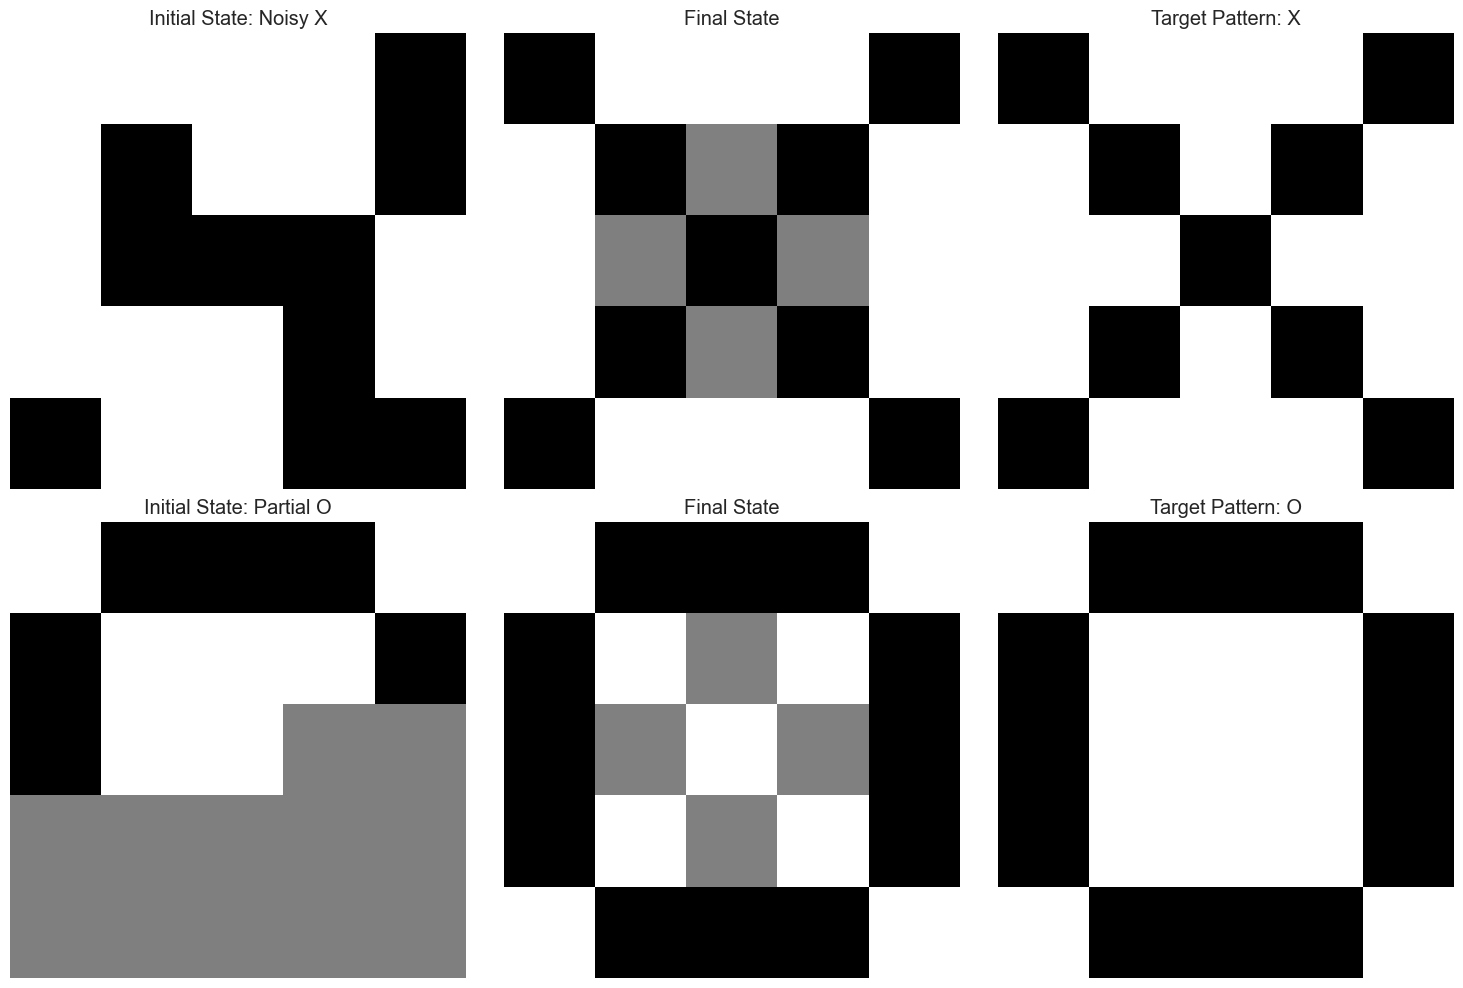

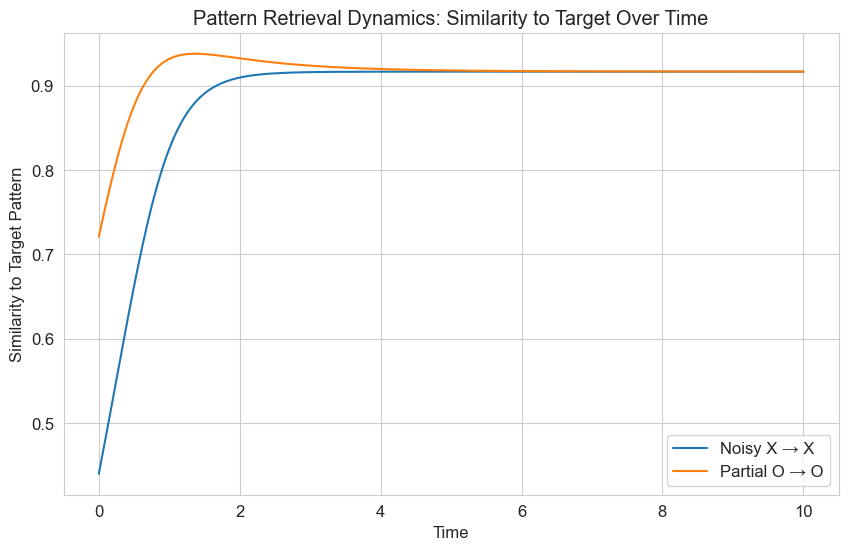

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Simplified continuous Hopfield network
def hopfield_dynamics(t, x, W, tau=1.0, I=None):
    """Dynamics of a continuous Hopfield network
    
    Parameters:
    t: Time
    x: Network state
    W: Weight matrix
    tau: Time constant
    I: External input
    """
    # Activation function (hyperbolic tangent)
    sigma = np.tanh
    
    # Calculate the derivative
    if I is None:
        I = np.zeros_like(x)
    
    dxdt = (-x + np.dot(W, sigma(x)) + I) / tau
    return dxdt

# Create a simple 5x5 binary pattern (a letter 'X')
pattern_X = np.array([
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1]
]).flatten() * 2 - 1  # Convert to -1/1

# Create another pattern (a letter 'O')
pattern_O = np.array([
    [0, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 1, 0]
]).flatten() * 2 - 1  # Convert to -1/1

# Store these patterns in the network using Hebbian learning
n_neurons = len(pattern_X)
W = np.zeros((n_neurons, n_neurons))

# Add pattern_X to the weights
W += np.outer(pattern_X, pattern_X)

# Add pattern_O to the weights
W += np.outer(pattern_O, pattern_O)

# Remove self-connections
np.fill_diagonal(W, 0)

# Normalize weights
W /= n_neurons

# Time points
t = np.linspace(0, 10, 1000)

# Create partial/corrupted versions of patterns for testing
# Create a noisy version of X (30% noise)
np.random.seed(42)
noise_level = 0.3
noisy_X = pattern_X.copy()
noise_indices = np.random.choice(n_neurons, int(n_neurons * noise_level), replace=False)
noisy_X[noise_indices] *= -1

# Create a partial version of O (top half only)
partial_O = pattern_O.copy()
partial_O[13:] = 0  # Zero out bottom half

# Define initial states
initial_states = [noisy_X, partial_O]
state_names = ['Noisy X', 'Partial O']
target_patterns = [pattern_X, pattern_O]
target_names = ['X', 'O']

# Solve the network dynamics for each initial state
plt.figure(figsize=(15, 10))

for i, (initial_state, state_name, target) in enumerate(zip(initial_states, state_names, target_patterns)):
    # Solve the ODE
    solution = solve_ivp(
        lambda t, x: hopfield_dynamics(t, x, W),
        [t[0], t[-1]],
        initial_state,
        t_eval=t,
        method='RK45'
    )
    
    # Plot the initial state
    plt.subplot(2, 3, i*3 + 1)
    plt.imshow(initial_state.reshape(5, 5), cmap='binary', interpolation='nearest')
    plt.title(f'Initial State: {state_name}')
    plt.axis('off')
    
    # Plot the final state
    plt.subplot(2, 3, i*3 + 2)
    plt.imshow(solution.y[:, -1].reshape(5, 5), cmap='binary', interpolation='nearest')
    plt.title(f'Final State')
    plt.axis('off')
    
    # Plot the target pattern
    plt.subplot(2, 3, i*3 + 3)
    plt.imshow(target.reshape(5, 5), cmap='binary', interpolation='nearest')
    plt.title(f'Target Pattern: {target_names[i]}')
    plt.axis('off')
    
    # Calculate similarity over time
    similarity = np.zeros(len(t))
    for j in range(len(t)):
        # Cosine similarity between current state and target
        state = solution.y[:, j]
        similarity[j] = np.dot(state, target) / (np.linalg.norm(state) * np.linalg.norm(target))

plt.tight_layout()
plt.show()

# Plot the similarity over time
plt.figure(figsize=(10, 6))
for i, (state_name, target_name) in enumerate(zip(state_names, target_names)):
    # Solve again to get the data
    solution = solve_ivp(
        lambda t, x: hopfield_dynamics(t, x, W),
        [t[0], t[-1]],
        initial_states[i],
        t_eval=t,
        method='RK45'
    )
    
    # Calculate similarity over time
    similarity = np.zeros(len(t))
    for j in range(len(t)):
        state = solution.y[:, j]
        similarity[j] = np.dot(state, target_patterns[i]) / (np.linalg.norm(state) * np.linalg.norm(target_patterns[i]))
    
    plt.plot(t, similarity, label=f'{state_name} → {target_name}')

plt.title('Pattern Retrieval Dynamics: Similarity to Target Over Time')
plt.xlabel('Time')
plt.ylabel('Similarity to Target Pattern')
plt.legend()
plt.grid(True)
plt.show()

The plots above demonstrate how the Hopfield network can retrieve stored patterns from noisy or partial inputs. This is analogous to how human memory works - we can often recall complete memories from partial cues. The differential equations govern the dynamics of this pattern completion process.

## 7. Dynamical Systems Theory in Psychology

Dynamical systems theory provides a mathematical framework for understanding how complex systems change over time. In psychology, this approach has been applied to various phenomena including motor control, cognitive development, and social dynamics.

### 7.1 Attractors and Stability

Key concepts in dynamical systems theory include:

1. **Fixed points**: States where the system remains unchanged over time ($\frac{dx}{dt} = 0$)
2. **Attractors**: Stable states that neighboring trajectories converge to
3. **Repellers**: Unstable states that trajectories diverge from
4. **Limit cycles**: Closed trajectories that represent periodic behavior
5. **Bifurcations**: Qualitative changes in dynamics as parameters vary

Let's examine a simple nonlinear system with multiple attractors that could represent different cognitive or behavioral states:

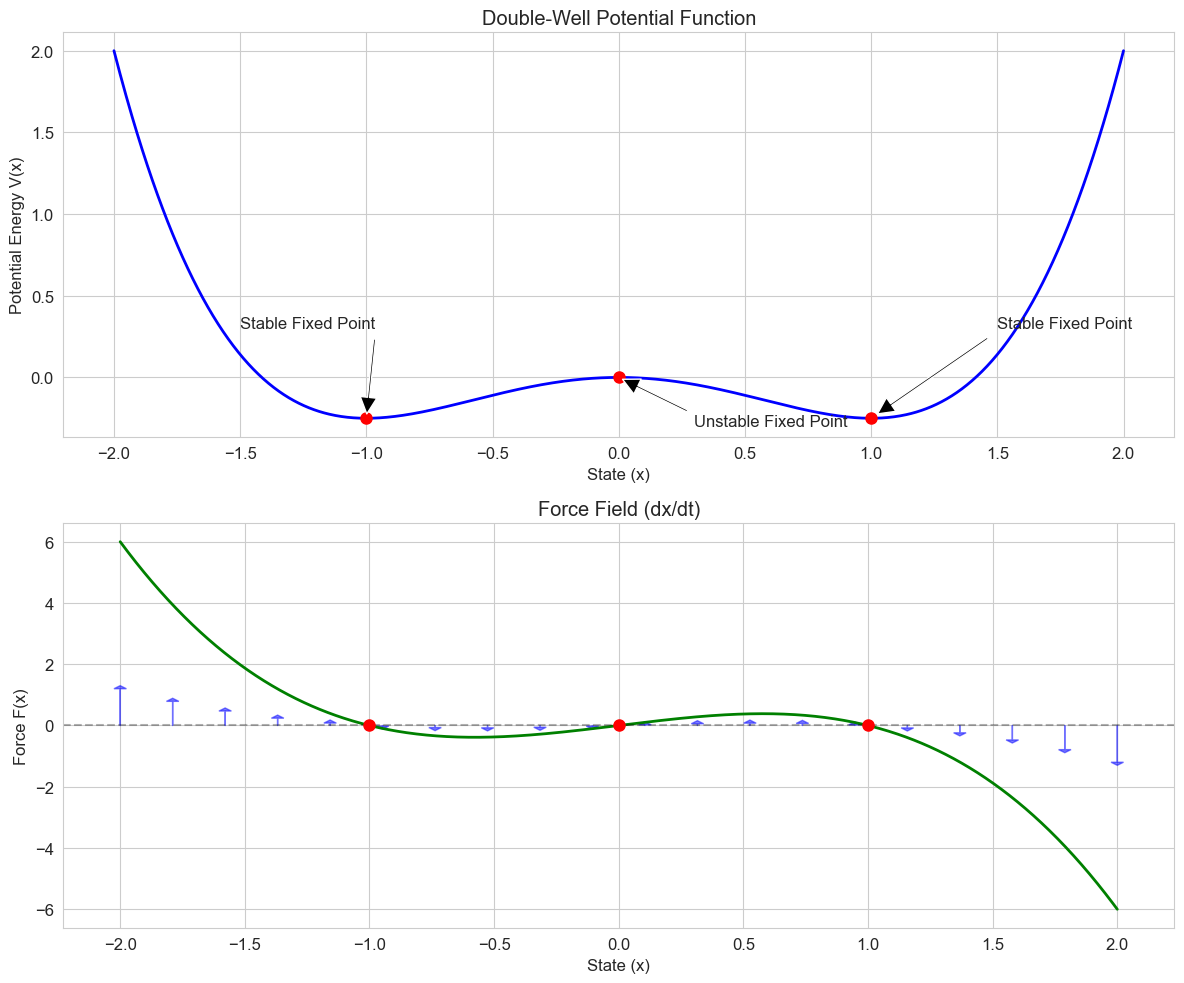

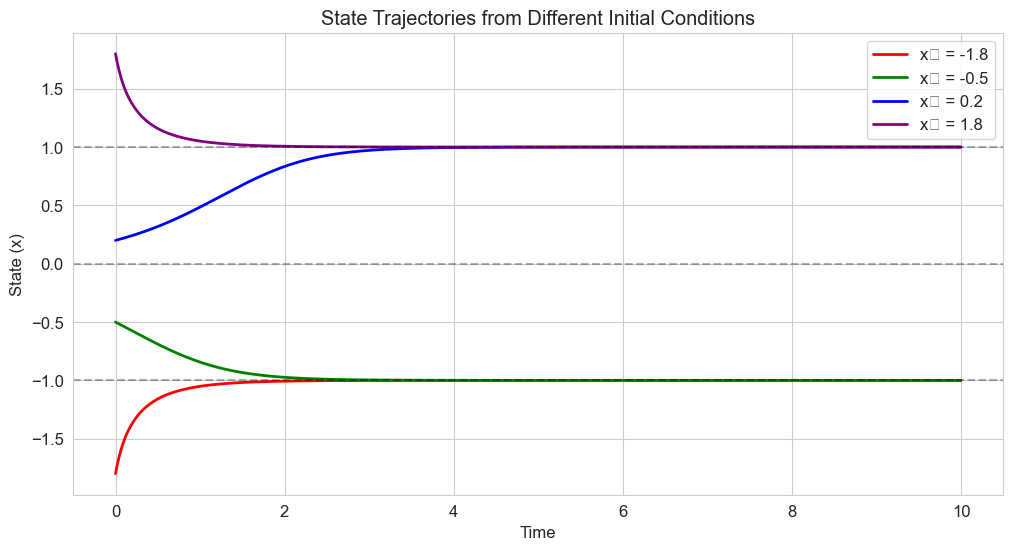

In [18]:
# Double-well potential system
def double_well(t, x, a=1.0, b=1.0, noise=0.0):
    """Double-well potential system representing bistable dynamics
    
    The potential function is V(x) = -a/2 * x^2 + b/4 * x^4
    The dynamics are dx/dt = -dV/dx = a*x - b*x^3 + noise
    
    Parameters:
    t: Time (not used, included for solver compatibility)
    x: State variable
    a, b: Parameters controlling the shape of the potential
    noise: Optional noise term
    """
    if np.isscalar(x):
        return a * x - b * x**3
    else:
        return np.array([a * xi - b * xi**3 for xi in x])

# Calculate the potential function
def potential(x, a=1.0, b=1.0):
    """Potential function for the double-well system"""
    return -a/2 * x**2 + b/4 * x**4

# Grid of x values for plotting
x = np.linspace(-2, 2, 1000)

# Calculate the potential and its derivative (the force)
V = potential(x)
F = double_well(0, x)

# Create figure
plt.figure(figsize=(12, 10))

# Plot the potential function
plt.subplot(2, 1, 1)
plt.plot(x, V, 'b-', linewidth=2)
plt.title('Double-Well Potential Function')
plt.xlabel('State (x)')
plt.ylabel('Potential Energy V(x)')
plt.grid(True)

# Mark the fixed points
fixed_points = [0, -1, 1]  # x = 0 (unstable), x = ±1 (stable)
potentials = [potential(fp) for fp in fixed_points]
plt.plot(fixed_points, potentials, 'ro', markersize=8)

# Add annotations
plt.annotate('Unstable Fixed Point', xy=(0, potential(0)), xytext=(0.3, -0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Stable Fixed Point', xy=(-1, potential(-1)), xytext=(-1.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Stable Fixed Point', xy=(1, potential(1)), xytext=(1.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Plot the force (negative gradient of potential)
plt.subplot(2, 1, 2)
plt.plot(x, F, 'g-', linewidth=2)
plt.title('Force Field (dx/dt)')
plt.xlabel('State (x)')
plt.ylabel('Force F(x)')
plt.grid(True)

# Add horizontal line at y = 0
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Mark the fixed points
plt.plot(fixed_points, [0, 0, 0], 'ro', markersize=8)

# Add arrows to indicate flow direction
for xi in np.linspace(-2, 2, 20):
    if xi != 0 and abs(xi) != 1:  # Skip fixed points
        force = double_well(0, xi)
        plt.arrow(xi, 0, 0, force/5, head_width=0.05, head_length=0.1, fc='blue', ec='blue', alpha=0.5)

plt.tight_layout()
plt.show()

# Simulate trajectories from different initial conditions
initial_conditions = [-1.8, -0.5, 0.2, 1.8]
colors = ['red', 'green', 'blue', 'purple']
labels = [f'x₀ = {x0}' for x0 in initial_conditions]

plt.figure(figsize=(12, 6))

# Time points
t = np.linspace(0, 10, 1000)

# Solve and plot trajectories
for x0, color, label in zip(initial_conditions, colors, labels):
    solution = solve_ivp(
        double_well,
        [t[0], t[-1]],
        [x0],
        t_eval=t,
        method='RK45'
    )
    
    plt.plot(solution.t, solution.y[0], color=color, linewidth=2, label=label)

# Add horizontal lines at fixed points
for fp in fixed_points:
    plt.axhline(y=fp, color='k', linestyle='--', alpha=0.3)

plt.title('State Trajectories from Different Initial Conditions')
plt.xlabel('Time')
plt.ylabel('State (x)')
plt.legend()
plt.grid(True)
plt.show()

### 7.2 Bifurcations: Qualitative Changes in Behavior

Bifurcations occur when small changes in system parameters lead to qualitative changes in dynamics. These can model transitions between different psychological states or behaviors.

Let's explore a pitchfork bifurcation, which can represent the emergence of two distinct behavioral options from a single state:

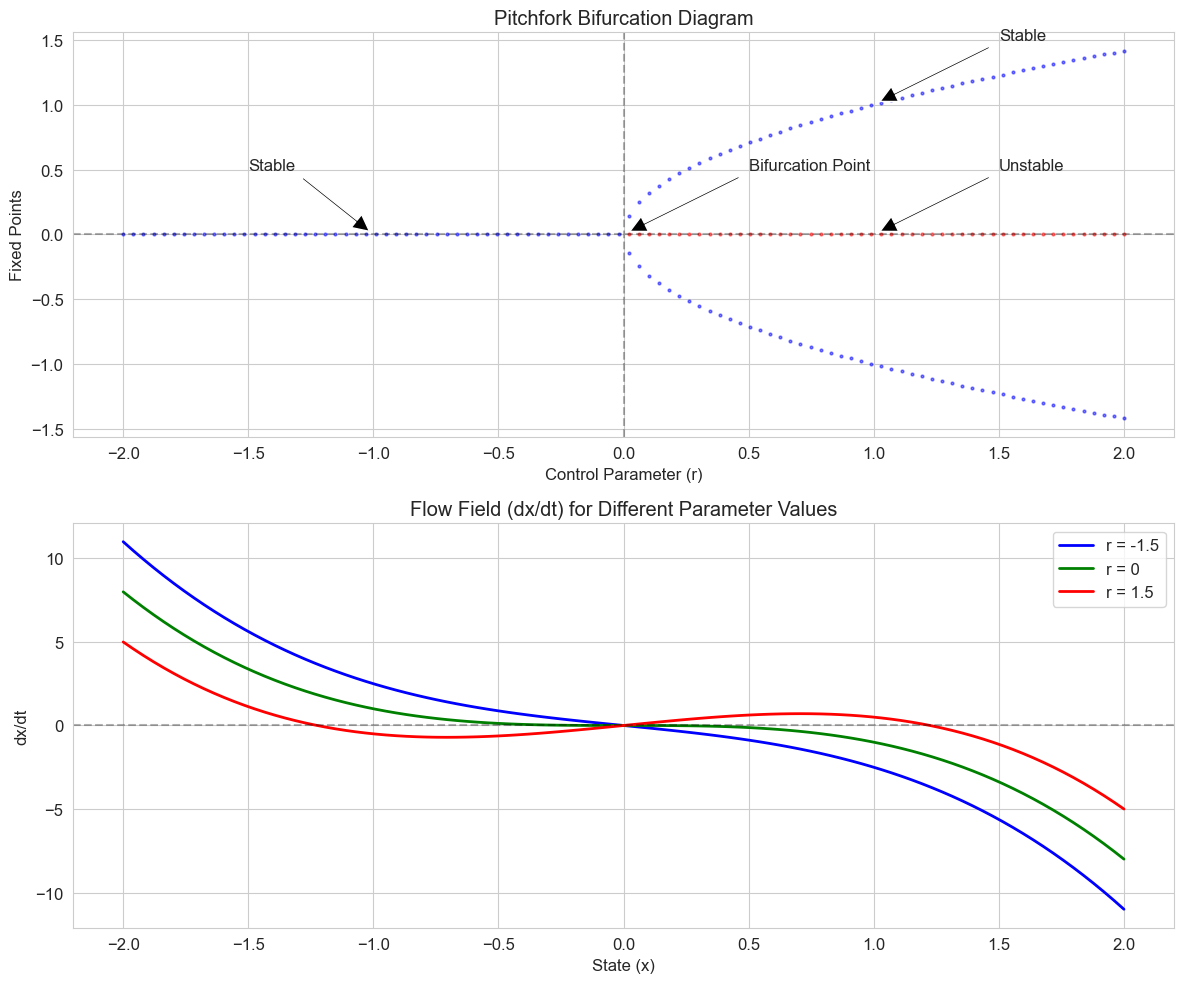

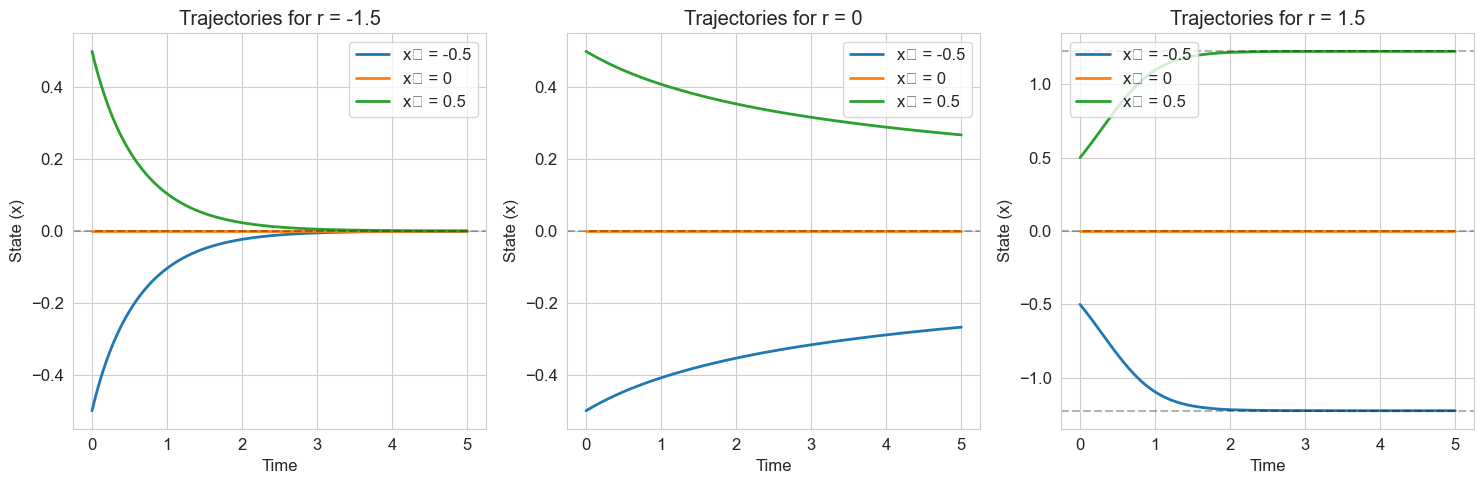

In [19]:
# Pitchfork bifurcation model
def pitchfork(t, x, r):
    """Pitchfork bifurcation model: dx/dt = rx - x^3
    
    Parameters:
    t: Time (not used, included for solver compatibility)
    x: State variable
    r: Control parameter
    """
    return r * x - x**3

# Create a grid of parameter values
r_values = np.linspace(-2, 2, 100)

# Calculate fixed points for each parameter value
fixed_points = []
for r in r_values:
    if r <= 0:
        fixed_points.append([0])  # Only one fixed point: x = 0
    else:
        fixed_points.append([0, np.sqrt(r), -np.sqrt(r)])  # Three fixed points

# Create figure
plt.figure(figsize=(12, 10))

# Plot the bifurcation diagram
plt.subplot(2, 1, 1)
for r_idx, r in enumerate(r_values):
    for fp in fixed_points[r_idx]:
        # Determine stability
        if fp == 0 and r > 0:  # Unstable fixed point
            plt.plot(r, fp, 'ro', markersize=2, alpha=0.5)
        else:  # Stable fixed points
            plt.plot(r, fp, 'bo', markersize=2, alpha=0.5)

plt.title('Pitchfork Bifurcation Diagram')
plt.xlabel('Control Parameter (r)')
plt.ylabel('Fixed Points')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True)

# Add annotations
plt.annotate('Bifurcation Point', xy=(0, 0), xytext=(0.5, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Stable', xy=(-1, 0), xytext=(-1.5, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Unstable', xy=(1, 0), xytext=(1.5, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.annotate('Stable', xy=(1, 1), xytext=(1.5, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Plot the flow field for different parameter values
plt.subplot(2, 1, 2)
x = np.linspace(-2, 2, 100)

selected_r = [-1.5, 0, 1.5]  # Before, at, and after bifurcation
colors = ['blue', 'green', 'red']
labels = [f'r = {r}' for r in selected_r]

for r, color, label in zip(selected_r, colors, labels):
    dxdt = [pitchfork(0, xi, r) for xi in x]
    plt.plot(x, dxdt, color=color, linewidth=2, label=label)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.title('Flow Field (dx/dt) for Different Parameter Values')
plt.xlabel('State (x)')
plt.ylabel('dx/dt')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Simulate trajectories for different parameter values
plt.figure(figsize=(15, 5))

# Time points
t = np.linspace(0, 5, 500)

# Initial conditions
x0_values = [-0.5, 0, 0.5]

for i, r in enumerate(selected_r):
    plt.subplot(1, 3, i+1)
    
    for x0 in x0_values:
        solution = solve_ivp(
            lambda t, x: pitchfork(t, x, r),
            [t[0], t[-1]],
            [x0],
            t_eval=t,
            method='RK45'
        )
        
        plt.plot(solution.t, solution.y[0], linewidth=2, label=f'x₀ = {x0}')
    
    # Plot fixed points
    if r <= 0:
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    else:
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        plt.axhline(y=np.sqrt(r), color='k', linestyle='--', alpha=0.3)
        plt.axhline(y=-np.sqrt(r), color='k', linestyle='--', alpha=0.3)
    
    plt.title(f'Trajectories for r = {r}')
    plt.xlabel('Time')
    plt.ylabel('State (x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### 7.3 Psychological Example: Decision Making Under Ambiguity

Let's apply these concepts to model decision making under ambiguity. When evidence is unclear, people may waver between options before committing to a choice. This can be modeled as a dynamical system with changing stability properties.

We'll model the decision variable $x$ with the following dynamics:

$$\frac{dx}{dt} = (e + bx - x^3)$$

Where:
- $x$ is the decision state (positive values favor one option, negative values the other)
- $e$ is the evidence in favor of one option
- $b$ is a parameter representing decisiveness or confidence

Let's implement and visualize this model:

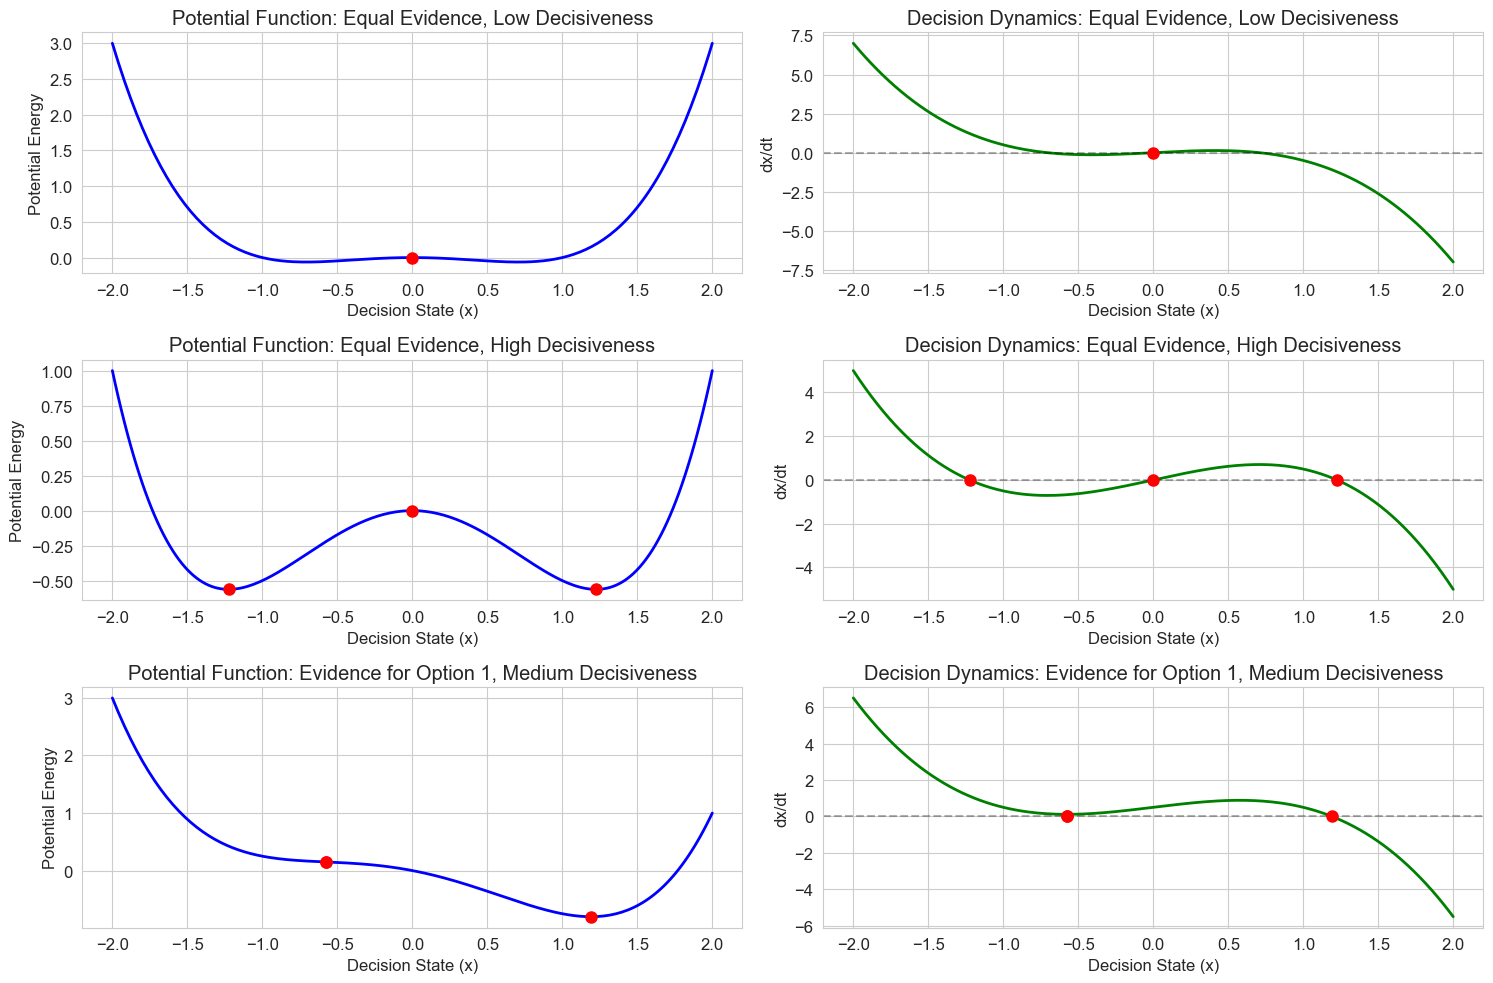

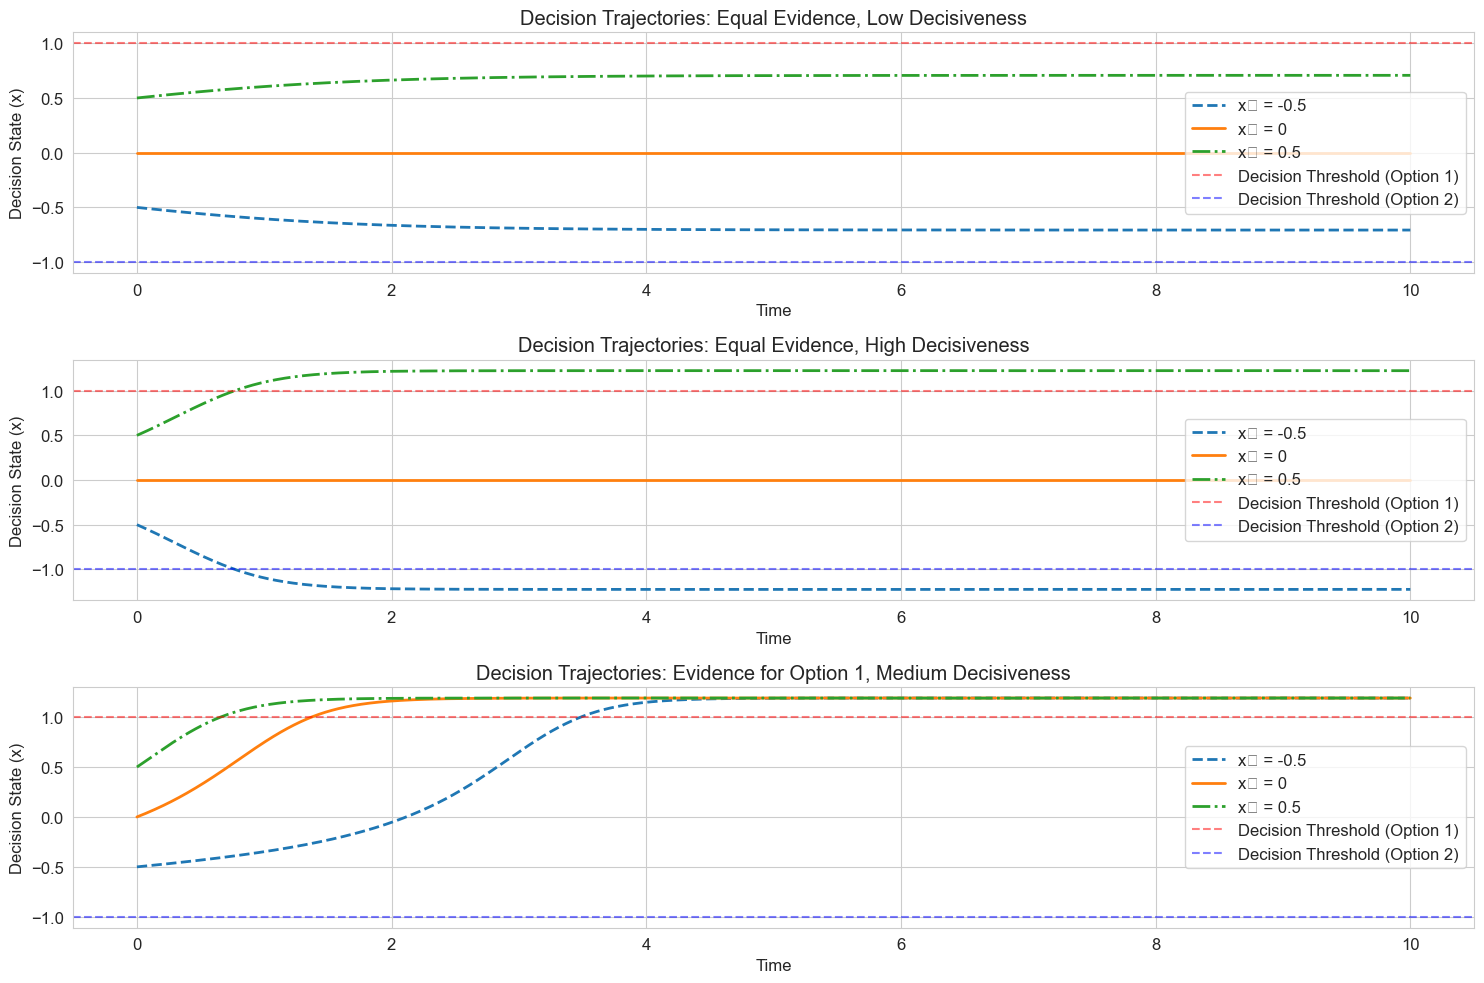

In [20]:
# Decision making model
def decision_dynamics(t, x, evidence, decisiveness):
    """Model for decision making under ambiguity
    
    Parameters:
    t: Time (not used, included for solver compatibility)
    x: Decision state
    evidence: Net evidence in favor of option 1 over option 2
    decisiveness: Parameter controlling the tendency to commit to a decision
    """
    return evidence + decisiveness * x - x**3

# Create a grid of state values
x = np.linspace(-2, 2, 200)

# Different scenarios
scenarios = [
    {'evidence': 0.0, 'decisiveness': 0.5, 'name': 'Equal Evidence, Low Decisiveness'},
    {'evidence': 0.0, 'decisiveness': 1.5, 'name': 'Equal Evidence, High Decisiveness'},
    {'evidence': 0.5, 'decisiveness': 1.0, 'name': 'Evidence for Option 1, Medium Decisiveness'}
]

# Create figure
plt.figure(figsize=(15, 10))

for i, scenario in enumerate(scenarios):
    e = scenario['evidence']
    b = scenario['decisiveness']
    name = scenario['name']
    
    # Calculate the potential function
    potential = -e * x - b/2 * x**2 + x**4/4
    
    # Calculate the dynamics
    dxdt = [decision_dynamics(0, xi, e, b) for xi in x]
    
    # Calculate the fixed points
    if b <= 1 and abs(e) < 2/np.sqrt(27):  # One fixed point
        # Use numerical methods to find the roots
        from scipy.optimize import fsolve
        fixed_point = fsolve(lambda x: decision_dynamics(0, x, e, b), [0])[0]
        fixed_points = [fixed_point]
    else:  # Three fixed points
        # This is an approximation - for precise values, use numerical methods
        if e == 0:
            fixed_points = [0, np.sqrt(b), -np.sqrt(b)]
        else:
            # Use numerical methods to find all roots
            from scipy.optimize import fsolve
            guesses = [-1.5, 0, 1.5]  # Initial guesses
            fixed_points = [fsolve(lambda x: decision_dynamics(0, x, e, b), [guess])[0] for guess in guesses]
    
    # Plot the potential function
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(x, potential, 'b-', linewidth=2)
    plt.title(f'Potential Function: {name}')
    plt.xlabel('Decision State (x)')
    plt.ylabel('Potential Energy')
    plt.grid(True)
    
    # Mark fixed points on potential
    for fp in fixed_points:
        fp_potential = -e * fp - b/2 * fp**2 + fp**4/4
        plt.plot(fp, fp_potential, 'ro', markersize=8)
    
    # Plot the dynamics
    plt.subplot(3, 2, 2*i + 2)
    plt.plot(x, dxdt, 'g-', linewidth=2)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.title(f'Decision Dynamics: {name}')
    plt.xlabel('Decision State (x)')
    plt.ylabel('dx/dt')
    plt.grid(True)
    
    # Mark fixed points on dynamics
    plt.plot(fixed_points, [0] * len(fixed_points), 'ro', markersize=8)

plt.tight_layout()
plt.show()

# Simulate trajectories for different scenarios
plt.figure(figsize=(15, 10))

# Time points
t = np.linspace(0, 10, 1000)

# Initial conditions
x0_values = [-0.5, 0, 0.5]
line_styles = ['--', '-', '-.']

for i, scenario in enumerate(scenarios):
    e = scenario['evidence']
    b = scenario['decisiveness']
    name = scenario['name']
    
    plt.subplot(3, 1, i+1)
    
    for x0, ls in zip(x0_values, line_styles):
        solution = solve_ivp(
            lambda t, x: decision_dynamics(t, x, e, b),
            [t[0], t[-1]],
            [x0],
            t_eval=t,
            method='RK45'
        )
        
        plt.plot(solution.t, solution.y[0], linestyle=ls, linewidth=2, label=f'x₀ = {x0}')
    
    # Mark decision thresholds
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Decision Threshold (Option 1)')
    plt.axhline(y=-1, color='b', linestyle='--', alpha=0.5, label='Decision Threshold (Option 2)')
    
    plt.title(f'Decision Trajectories: {name}')
    plt.xlabel('Time')
    plt.ylabel('Decision State (x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 8. Stochastic Differential Equations

Many psychological processes involve randomness or noise. Stochastic differential equations (SDEs) extend ordinary differential equations by incorporating random processes.

A general form of an SDE is:

$$dX_t = f(X_t, t)dt + g(X_t, t)dW_t$$

Where:
- $f(X_t, t)$ is the drift term (deterministic component)
- $g(X_t, t)$ is the diffusion term (random component)
- $dW_t$ is the differential of a Wiener process (Gaussian white noise)

Let's implement a simple stochastic differential equation model for decision making, the Ornstein-Uhlenbeck process:

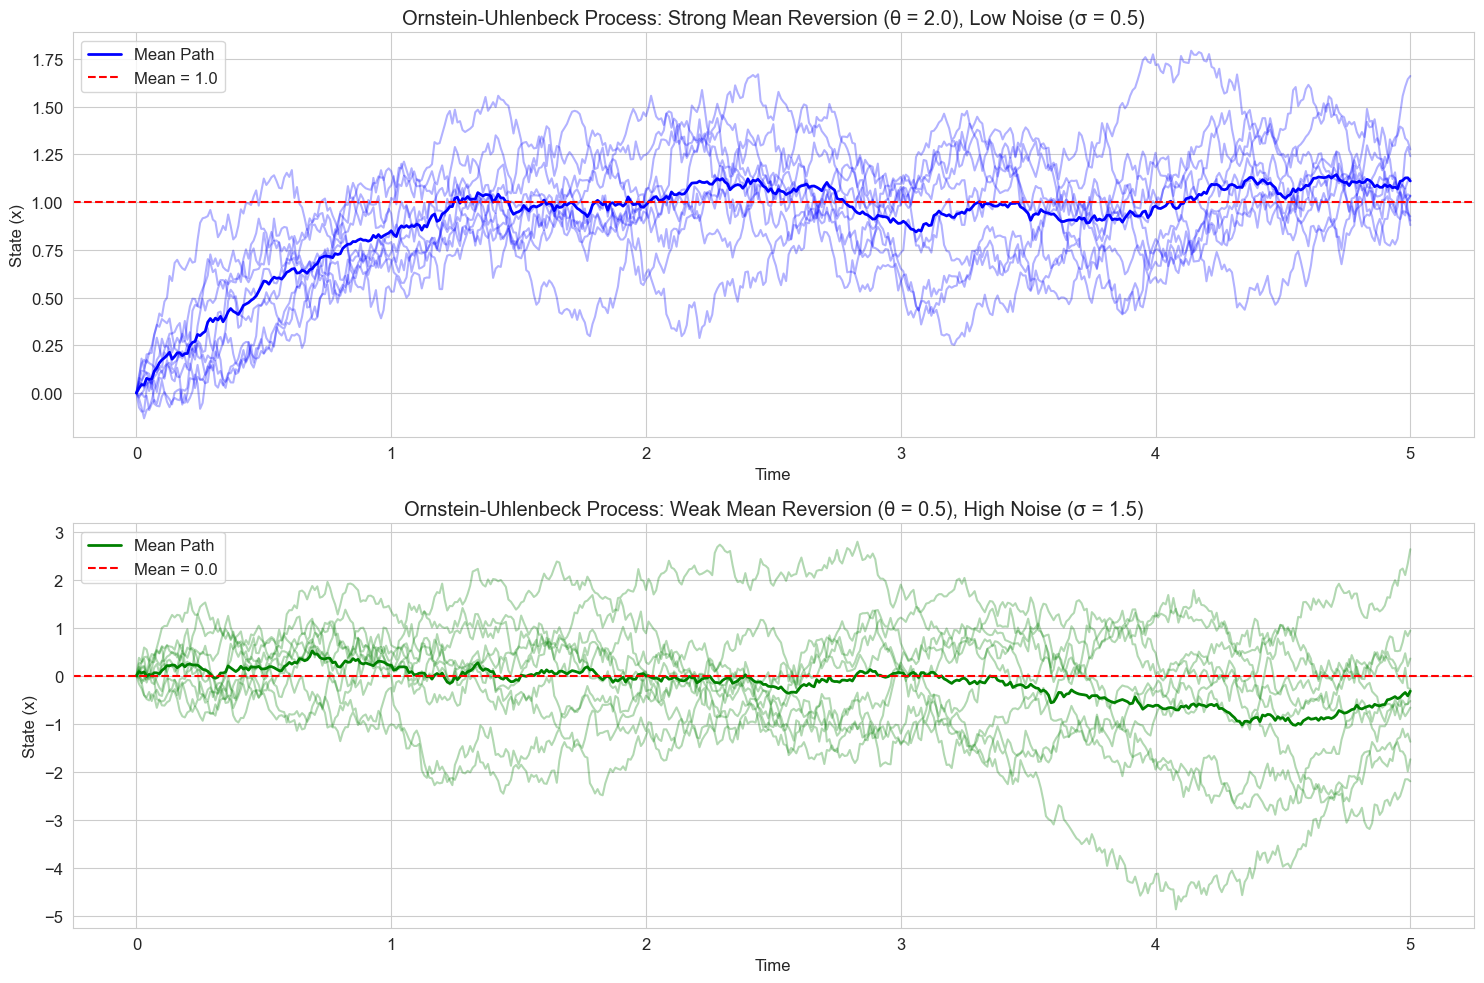

In [21]:
# Ornstein-Uhlenbeck process for noisy decision making
def ornstein_uhlenbeck_step(x, dt, theta, mu, sigma):
    """Single step of the Ornstein-Uhlenbeck process
    
    Parameters:
    x: Current state
    dt: Time step
    theta: Mean reversion strength
    mu: Long-term mean
    sigma: Noise magnitude
    """
    drift = theta * (mu - x) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal()
    return x + drift + diffusion

# Simulate multiple paths of the Ornstein-Uhlenbeck process
def simulate_ou_paths(x0, n_steps, dt, theta, mu, sigma, n_paths=10):
    """Simulate multiple paths of the Ornstein-Uhlenbeck process
    
    Parameters:
    x0: Initial state
    n_steps: Number of time steps
    dt: Time step size
    theta: Mean reversion strength
    mu: Long-term mean
    sigma: Noise magnitude
    n_paths: Number of paths to simulate
    
    Returns:
    t: Time points
    paths: Array of simulated paths (n_paths x n_steps)
    """
    t = np.linspace(0, n_steps * dt, n_steps + 1)
    paths = np.zeros((n_paths, n_steps + 1))
    
    # Set initial condition for all paths
    paths[:, 0] = x0
    
    # Simulate each path
    for i in range(n_paths):
        for j in range(1, n_steps + 1):
            paths[i, j] = ornstein_uhlenbeck_step(paths[i, j-1], dt, theta, mu, sigma)
    
    return t, paths

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
x0 = 0.0      # Initial state
n_steps = 500 # Number of time steps
dt = 0.01     # Time step size
n_paths = 10  # Number of paths to simulate

# Create figure
plt.figure(figsize=(15, 10))

# Scenario 1: Strong mean reversion, low noise
theta1 = 2.0  # Strong mean reversion
mu1 = 1.0     # Mean above zero
sigma1 = 0.5  # Low noise

t, paths1 = simulate_ou_paths(x0, n_steps, dt, theta1, mu1, sigma1, n_paths)

plt.subplot(2, 1, 1)
for i in range(n_paths):
    plt.plot(t, paths1[i, :], 'b-', alpha=0.3)
plt.plot(t, np.mean(paths1, axis=0), 'b-', linewidth=2, label='Mean Path')
plt.axhline(y=mu1, color='r', linestyle='--', label=f'Mean = {mu1}')
plt.title(f'Ornstein-Uhlenbeck Process: Strong Mean Reversion (θ = {theta1}), Low Noise (σ = {sigma1})')
plt.xlabel('Time')
plt.ylabel('State (x)')
plt.legend()
plt.grid(True)

# Scenario 2: Weak mean reversion, high noise
theta2 = 0.5  # Weak mean reversion
mu2 = 0.0     # Mean at zero
sigma2 = 1.5  # High noise

t, paths2 = simulate_ou_paths(x0, n_steps, dt, theta2, mu2, sigma2, n_paths)

plt.subplot(2, 1, 2)
for i in range(n_paths):
    plt.plot(t, paths2[i, :], 'g-', alpha=0.3)
plt.plot(t, np.mean(paths2, axis=0), 'g-', linewidth=2, label='Mean Path')
plt.axhline(y=mu2, color='r', linestyle='--', label=f'Mean = {mu2}')
plt.title(f'Ornstein-Uhlenbeck Process: Weak Mean Reversion (θ = {theta2}), High Noise (σ = {sigma2})')
plt.xlabel('Time')
plt.ylabel('State (x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 8.1 Stochastic Decision Models

Stochastic differential equations are particularly useful for modeling decision processes, where evidence accumulation includes both systematic and random components. Let's implement a stochastic version of the drift diffusion model:

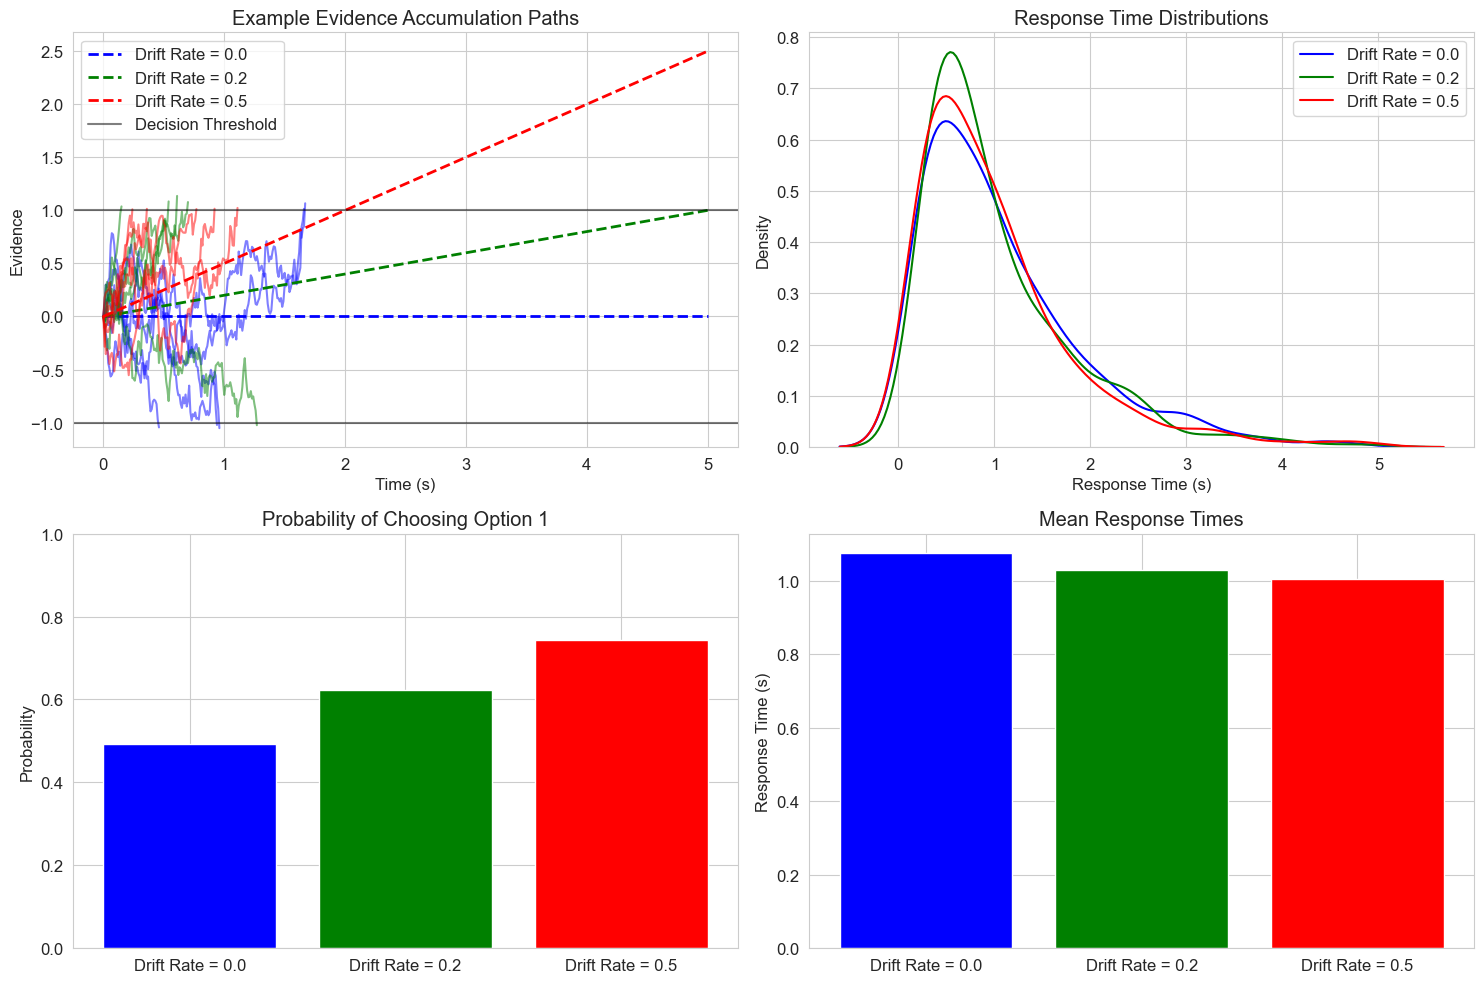

In [22]:
# Stochastic drift diffusion model
def simulate_ddm_trial(drift_rate, noise_sd, threshold, dt=0.01, max_time=10.0):
    """Simulate a single trial of the stochastic drift diffusion model
    
    Parameters:
    drift_rate: Mean drift rate (evidence strength)
    noise_sd: Standard deviation of noise
    threshold: Decision threshold
    dt: Time step
    max_time: Maximum simulation time
    
    Returns:
    times: Array of time points
    positions: Array of evidence accumulation
    decision: Final decision (1 for upper threshold, -1 for lower threshold, 0 for timeout)
    rt: Response time
    """
    # Initialize
    times = [0]
    positions = [0]  # Start at zero evidence
    t = 0
    
    while t < max_time:
        # Update time
        t += dt
        times.append(t)
        
        # Calculate drift and diffusion terms
        drift = drift_rate * dt
        diffusion = noise_sd * np.sqrt(dt) * np.random.normal()
        
        # Update position
        new_position = positions[-1] + drift + diffusion
        positions.append(new_position)
        
        # Check if a threshold is reached
        if new_position >= threshold:
            return np.array(times), np.array(positions), 1, t  # Upper threshold
        elif new_position <= -threshold:
            return np.array(times), np.array(positions), -1, t  # Lower threshold
    
    # If max_time is reached without a decision
    return np.array(times), np.array(positions), 0, max_time

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
threshold = 1.0
noise_sd = 1.0
dt = 0.01
max_time = 5.0

# Different drift rates
drift_rates = [0.0, 0.2, 0.5]
labels = [f'Drift Rate = {drift}' for drift in drift_rates]
colors = ['blue', 'green', 'red']

# Number of trials to simulate
n_trials_per_plot = 5
n_trials_total = 500

# Create figure
plt.figure(figsize=(15, 10))

# Plot example trajectories
plt.subplot(2, 2, 1)
for drift_rate, color, label in zip(drift_rates, colors, labels):
    for _ in range(n_trials_per_plot):
        times, positions, decision, rt = simulate_ddm_trial(drift_rate, noise_sd, threshold, dt, max_time)
        plt.plot(times, positions, color=color, alpha=0.5)
    
    # Add a line for the mean drift (without noise)
    t_line = np.linspace(0, max_time, 100)
    mean_line = drift_rate * t_line
    plt.plot(t_line, mean_line, color=color, linestyle='--', linewidth=2, label=label)

# Plot thresholds
plt.axhline(y=threshold, color='k', linestyle='-', alpha=0.5, label='Decision Threshold')
plt.axhline(y=-threshold, color='k', linestyle='-', alpha=0.5)

plt.title('Example Evidence Accumulation Paths')
plt.xlabel('Time (s)')
plt.ylabel('Evidence')
plt.legend(loc='upper left')
plt.grid(True)

# Collect response times and decisions
all_rts = [[] for _ in drift_rates]
all_decisions = [[] for _ in drift_rates]

for i, drift_rate in enumerate(drift_rates):
    for _ in range(n_trials_total):
        _, _, decision, rt = simulate_ddm_trial(drift_rate, noise_sd, threshold, dt, max_time)
        
        # Only include trials where a decision was made
        if decision != 0:
            all_rts[i].append(rt)
            all_decisions[i].append(decision)

# Plot RT distributions
plt.subplot(2, 2, 2)
for i, (drift_rate, color, label) in enumerate(zip(drift_rates, colors, labels)):
    if all_rts[i]:  # Check if there are any RTs to plot
        sns.kdeplot(all_rts[i], color=color, label=label)

plt.title('Response Time Distributions')
plt.xlabel('Response Time (s)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Plot choice probabilities
plt.subplot(2, 2, 3)
choice_probs = []
for decisions in all_decisions:
    if decisions:  # Check if there are any decisions
        # Probability of choosing option 1 (upper threshold)
        prob = np.mean([d == 1 for d in decisions])
        choice_probs.append(prob)
    else:
        choice_probs.append(0)

plt.bar(labels, choice_probs, color=colors)
plt.title('Probability of Choosing Option 1')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(True, axis='y')

# Plot mean response times
plt.subplot(2, 2, 4)
mean_rts = []
for rts in all_rts:
    if rts:  # Check if there are any RTs
        mean_rts.append(np.mean(rts))
    else:
        mean_rts.append(0)

plt.bar(labels, mean_rts, color=colors)
plt.title('Mean Response Times')
plt.ylabel('Response Time (s)')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

### 8.2 Noise-Induced Transitions

An interesting phenomenon in stochastic systems is that noise can cause transitions between states that wouldn't occur in the deterministic case. Let's demonstrate this with a bistable system representing competing perceptual interpretations:

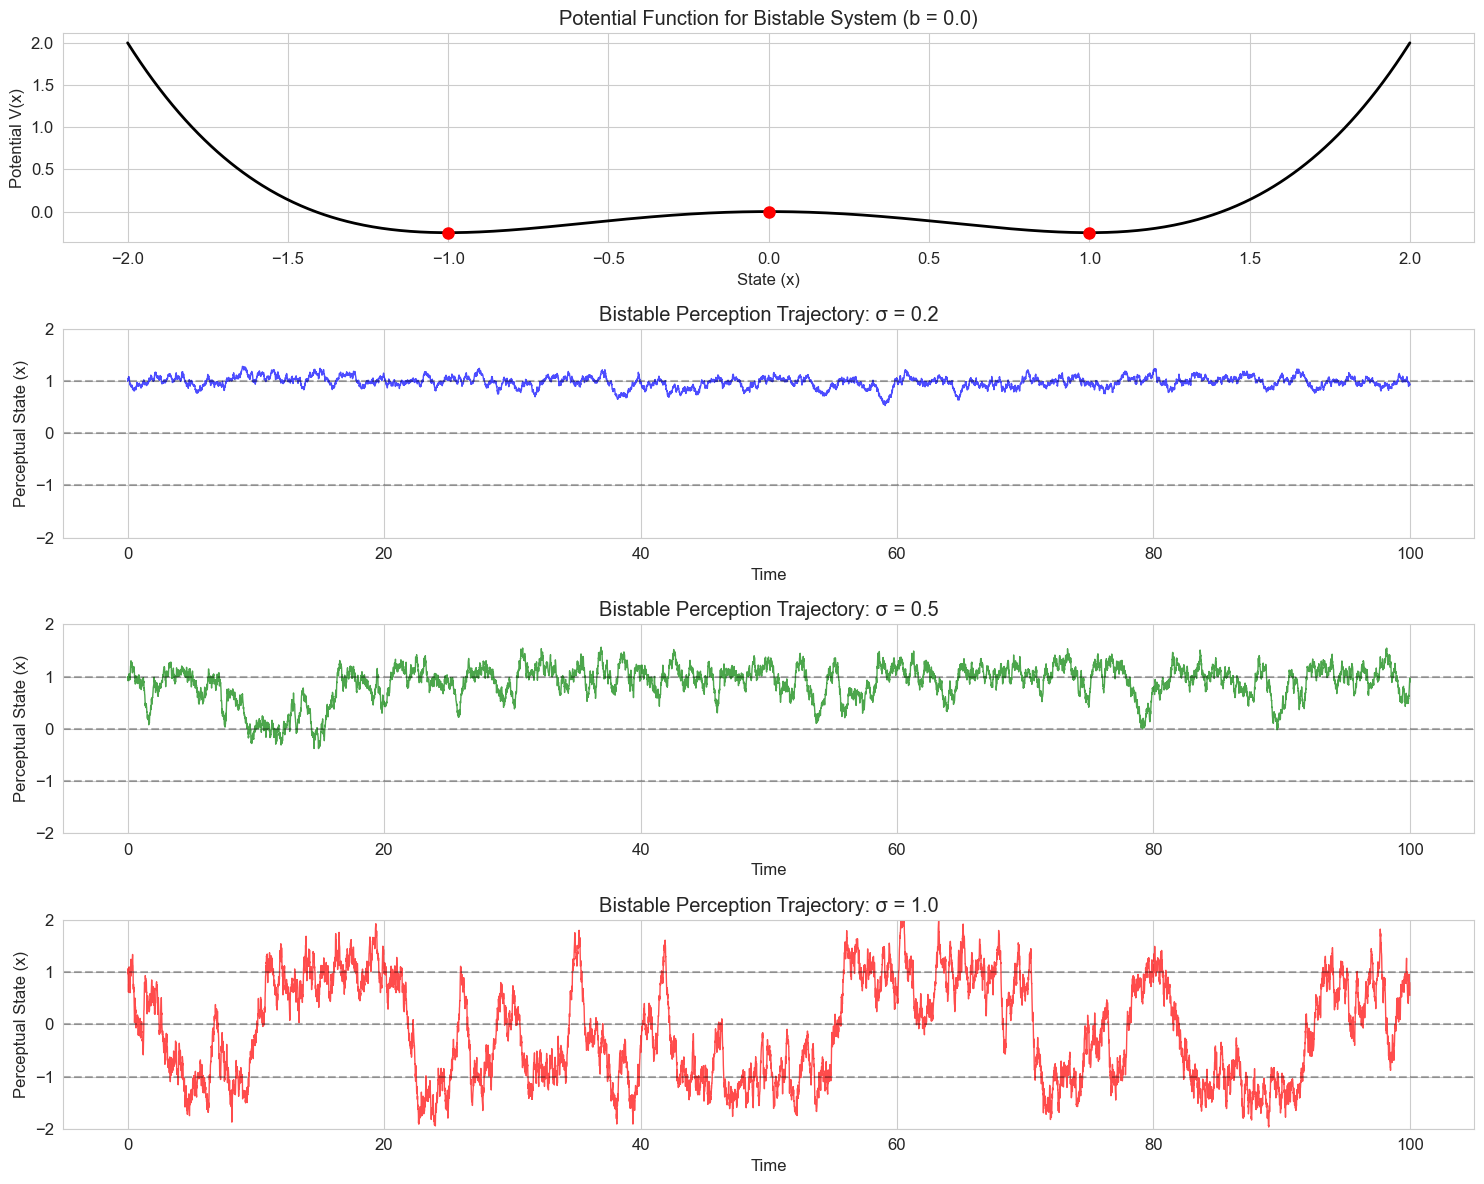

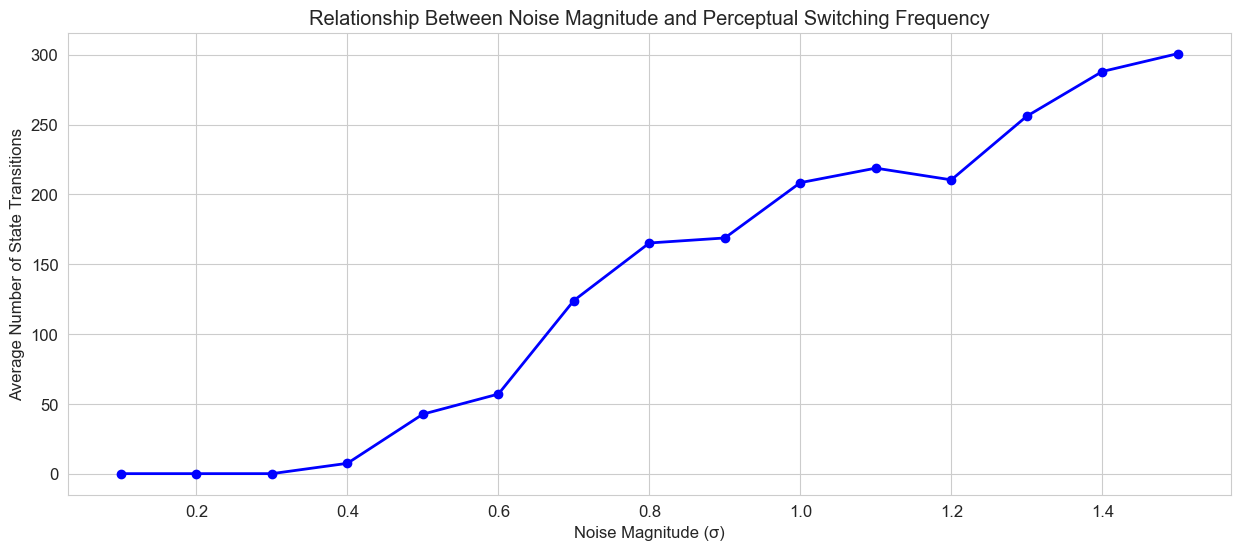

In [23]:
# Bistable perception model with noise
def bistable_perception_step(x, dt, b, sigma):
    """Single step of a bistable perception model with noise
    
    The deterministic dynamics are given by:
    dx/dt = x - x^3 + b
    
    Parameters:
    x: Current state
    dt: Time step
    b: Bias parameter
    sigma: Noise magnitude
    """
    drift = (x - x**3 + b) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal()
    return x + drift + diffusion

# Simulate the bistable perception model
def simulate_bistable(x0, n_steps, dt, b, sigma):
    """Simulate the bistable perception model
    
    Parameters:
    x0: Initial state
    n_steps: Number of time steps
    dt: Time step size
    b: Bias parameter
    sigma: Noise magnitude
    
    Returns:
    t: Time points
    x: Simulated state trajectory
    """
    t = np.linspace(0, n_steps * dt, n_steps + 1)
    x = np.zeros(n_steps + 1)
    x[0] = x0
    
    for i in range(1, n_steps + 1):
        x[i] = bistable_perception_step(x[i-1], dt, b, sigma)
    
    return t, x

# Plot the potential function for the bistable system
def plot_potential(x_range, b):
    """Plot the potential function for the bistable system
    
    The potential function V(x) is such that -dV/dx = x - x^3 + b
    This gives V(x) = -x^2/2 + x^4/4 - bx
    """
    V = -x_range**2/2 + x_range**4/4 - b*x_range
    plt.plot(x_range, V, 'k-', linewidth=2)
    plt.xlabel('State (x)')
    plt.ylabel('Potential V(x)')
    plt.grid(True)
    
    # Find and mark the fixed points (where dV/dx = 0)
    from scipy.optimize import fsolve
    
    # Define the derivative of the potential
    dVdx = lambda x: -(x - x**3 + b)
    
    # Find the fixed points using different initial guesses
    fixed_points = [fsolve(dVdx, guess)[0] for guess in [-2, 0, 2]]
    
    # Remove duplicates and sort
    fixed_points = sorted(list(set([round(fp, 6) for fp in fixed_points])))
    
    # Calculate potential at fixed points
    potentials = [-fp**2/2 + fp**4/4 - b*fp for fp in fixed_points]
    
    # Plot fixed points
    plt.plot(fixed_points, potentials, 'ro', markersize=8)
    
    return fixed_points, potentials

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
x0 = 1.0      # Initial state
n_steps = 10000 # Number of time steps
dt = 0.01     # Time step size
b = 0.0       # No bias

# Define state range for potential plot
x_range = np.linspace(-2, 2, 1000)

# Create figure
plt.figure(figsize=(15, 12))

# Simulate with different noise levels
sigmas = [0.2, 0.5, 1.0]  # Different noise magnitudes
labels = [f'σ = {sigma}' for sigma in sigmas]
colors = ['blue', 'green', 'red']

# Plot the potential function
plt.subplot(len(sigmas)+1, 1, 1)  # Make room for all trajectories
fixed_points, _ = plot_potential(x_range, b)
plt.title(f'Potential Function for Bistable System (b = {b})')

for i, (sigma, color, label) in enumerate(zip(sigmas, colors, labels)):
    # Simulate
    t, x = simulate_bistable(x0, n_steps, dt, b, sigma)
    
    # Plot trajectory
    plt.subplot(len(sigmas)+1, 1, i+2)  # Use dynamic grid size
    plt.plot(t, x, color=color, linewidth=1, alpha=0.7)
    
    # Add horizontal lines at fixed points
    for fp in fixed_points:
        plt.axhline(y=fp, color='k', linestyle='--', alpha=0.3)
    
    plt.title(f'Bistable Perception Trajectory: {label}')
    plt.xlabel('Time')
    plt.ylabel('Perceptual State (x)')
    plt.ylim(-2, 2)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analyze state transitions for different noise levels
plt.figure(figsize=(15, 6))

# Define threshold for state transition
threshold = 0.0  # State transition occurs when crossing zero

# Number of simulations for each noise level
n_sims = 5

# Storage for transition counts
transition_counts = []

for sigma in np.linspace(0.1, 1.5, 15):
    counts = []
    
    for _ in range(n_sims):
        # Simulate
        _, x = simulate_bistable(x0, n_steps, dt, b, sigma)
        
        # Count transitions (crossing threshold from either direction)
        transitions = 0
        for i in range(1, len(x)):
            if (x[i-1] < threshold and x[i] >= threshold) or (x[i-1] >= threshold and x[i] < threshold):
                transitions += 1
        
        counts.append(transitions)
    
    transition_counts.append(np.mean(counts))

# Plot transition frequency vs. noise magnitude
plt.plot(np.linspace(0.1, 1.5, 15), transition_counts, 'bo-', linewidth=2)
plt.title('Relationship Between Noise Magnitude and Perceptual Switching Frequency')
plt.xlabel('Noise Magnitude (σ)')
plt.ylabel('Average Number of State Transitions')
plt.grid(True)
plt.show()

## 9. Conclusion and Extensions

In this chapter, we've explored how differential equations can model various psychological phenomena, from learning and memory to neural dynamics and decision making. We've seen how these mathematical tools can help us formalize and test theories about cognitive processes.

Differential equations provide a powerful framework for understanding how psychological systems change over time, and how different factors influence these dynamics. They allow us to move beyond static models and capture the rich temporal patterns observed in human behavior and cognition.

### 9.1 Further Applications and Extensions

There are many more applications of differential equations in psychology that we haven't covered, including:

1. **Neural mass models**: Describing the activity of large populations of neurons
2. **Pharmacokinetic models**: Modeling how drugs are absorbed, distributed, and eliminated
3. **Developmental models**: Capturing changes in cognitive abilities across the lifespan
4. **Social dynamics**: Modeling how opinions and behaviors spread through social networks
5. **Control theory**: Understanding how systems maintain stability despite perturbations

### 9.2 Challenges and Limitations

While differential equations are powerful tools, they also have limitations when applied to psychological phenomena:

1. **Parameter estimation**: Fitting differential equation models to data can be challenging
2. **Model complexity**: More realistic models often require more parameters, increasing the risk of overfitting
3. **Validation**: Testing the predictions of these models against empirical data
4. **Individual differences**: Accounting for variability between individuals
5. **Discreteness**: Many psychological processes are inherently discrete rather than continuous

Despite these challenges, differential equations continue to be valuable tools for formalizing theories and generating testable predictions in psychological research.

### 9.3 Summary

In this chapter, we've explored:

- First-order differential equations for modeling learning, memory, and skill acquisition
- Second-order differential equations for modeling oscillatory behaviors
- Systems of differential equations for modeling interacting processes
- Neuronal models based on differential equations
- Dynamical systems approaches to cognition
- Stochastic differential equations incorporating noise and randomness

By combining these mathematical tools with psychological theories, we can develop more precise and testable models of human cognition and behavior.

## 10. Exercises

### 10.1 Basic Concepts

1. For the exponential decay model $\frac{dy}{dt} = -ky$, find the analytical solution where $y(0) = y_0$.

2. The logistic growth model is given by $\frac{dy}{dt} = ry(1-\frac{y}{K})$. Without solving the equation, what happens to the growth rate as $y$ approaches $K$?

3. Identify whether each of the following differential equations is linear or nonlinear:
   a) $\frac{dy}{dt} = 3y + t$
   b) $\frac{dy}{dt} = y^2 - 2t$
   c) $\frac{d^2y}{dt^2} + 3\frac{dy}{dt} + 2y = \sin(t)$

### 10.2 Implementing and Analyzing Models

4. Implement and visualize the von Bertalanffy growth model, which is used in developmental psychology:
   $\frac{dL}{dt} = k(L_{\infty} - L)$
   where $L$ is the current length/size, $L_{\infty}$ is the asymptotic maximum size, and $k$ is the growth rate.

5. Modify the Ebbinghaus forgetting curve model to include the effects of spaced repetition. How does the memory retention change with different spacing intervals?

6. Implement a predator-prey model where the prey population grows logistically (rather than exponentially) in the absence of predators. How does this change the dynamics compared to the standard Lotka-Volterra model?

### 10.3 Applying Models to Psychological Data

7. Generate synthetic data for a learning curve following the power law. Add random noise to the data. Then try to fit a power law model and an exponential model to the data. Which provides a better fit?

8. The Weber-Fechner law states that the just noticeable difference (JND) between two stimuli is proportional to the magnitude of the stimuli. Express this as a differential equation and solve it to derive the logarithmic relationship between stimulus intensity and perceived intensity.

9. Design a drift diffusion model for a simple perceptual decision task. Use the model to predict how accuracy and response times would change with different levels of stimulus clarity.

### 10.4 Extensions and Challenges

10. Implement a neural network model using systems of differential equations, where each neuron's activation follows a sigmoid function of its inputs. Train the network to perform a simple classification task.

11. Explore bifurcations in a model of attitude change, where attitudes can shift abruptly once a certain threshold of social influence is reached.

12. Develop a stochastic differential equation model for risky decision making, where noise represents uncertainty in outcomes. Explore how different levels of risk aversion affect choices under varying degrees of uncertainty.

13. Investigate delay differential equations, where the rate of change depends not only on the current state but also on past states. Apply this to model memory processes where past experiences influence current learning rates.

14. Implement a compartmental model using systems of differential equations to simulate the spread of information or behaviors in a social network. Experiment with different network structures and transmission rates.

15. Research and implement a dynamical systems model of emotion regulation, where emotional states evolve over time in response to events and regulation strategies. Analyze how different regulation parameters affect emotional trajectories.

### 12.1 Basic Calculus Review

To work effectively with differential equations, it's helpful to recall some basic calculus concepts:

- **Derivative**: The derivative of a function $f(x)$ with respect to $x$ is denoted as $f'(x)$ or $\frac{df}{dx}$ and represents the rate of change of the function at point $x$.

- **Partial Derivative**: For functions of multiple variables, the partial derivative with respect to one variable (holding others constant) is denoted as $\frac{\partial f}{\partial x}$.

- **Integral**: The indefinite integral of a function $f(x)$ is denoted as $\int f(x) dx$ and represents the family of antiderivatives of $f(x)$.

- **Definite Integral**: The definite integral $\int_a^b f(x) dx$ represents the signed area between the function and the x-axis from $x=a$ to $x=b$.

### 12.2 Differential Equation Terminology

- **Order**: The order of a differential equation is the highest derivative that appears in the equation.

- **Linear vs. Nonlinear**: A differential equation is linear if the dependent variable and its derivatives appear only as simple multiples or sums.

- **Homogeneous vs. Nonhomogeneous**: A linear differential equation is homogeneous if all terms containing the dependent variable can be written on one side of the equation and the other side is zero.

- **Initial Value Problem**: A differential equation with specified initial conditions.

- **Boundary Value Problem**: A differential equation with specified values at different points.

- **Stability**: A property of solutions that determines whether small perturbations grow or decay over time.

### 12.3 Numerical Methods

Several numerical methods are commonly used to solve differential equations when analytical solutions are not available:

- **Euler's Method**: The simplest numerical method, which approximates the solution by taking small steps in the direction of the derivative.

- **Runge-Kutta Methods**: A family of iterative methods that provide better accuracy than Euler's method. The 4th-order Runge-Kutta method (RK4) is widely used.

- **Adaptive Step Size Methods**: Methods that adjust the step size based on the estimated error, such as the Dormand-Prince method used in `scipy.integrate.solve_ivp`.

Understanding these mathematical concepts and numerical methods provides a foundation for working with differential equations in psychological research.